<a href="https://colab.research.google.com/github/MtHenriqueF/german-credit-risk-prediction/blob/main/german_credit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho - Aprendizado automático
## Parte 1
 A partir da base de dados enviada e do estudo sobre pré-processamentos, apresentar os resultados obtidos, utilizando o modelo **Decision Tree (DT)**, e discutir seus resultados dentro dos processos para Data Mining.

<br>

1) A partir da base de dados:
a. Descreva a base de dados descrendo os atributos, numéricos e categóricos, classificando segundo a escala (nominal ou razão) e a cardinalidade (discreta,
contínua, binária).
b. Descreva cada um dos atributos segundo frequência, mínimo e máximo valor,
dia desvios padrão, conforme o caso.
c. Avalie os resultados dos processos abaixo, caso sejam utilizados na base de
dados, após o processo de classificação com DT ter sido utilizado.
i. limpeza de dados (outlier, missing)
ii. normalização/transformação
iii. discretização

<br>

2) Faça uma análise de seleção de variáveis utilizando os métodos que julgar necessários, considerando o tipo de dado. Abaixo uma tabela é indicada para que possa usar como inspiração avaliação de importância composta dos métodos que considerar.
Dica: utilize uma tabela métodos x ranking com atributos selecionados.

|Método de seleção 1|Método de seleção 2|Método de seleção 3|Método de seleção 4|
--------------------|-------------------|-------------------|------------------|
| Atributo 1| | | |
| Atributo 2| | | |
| Atributo 3| | | |
| ... | | | |
| Atributo n| | | |


## Parte 2

A partir da base de dados enviada e do estudo sobre pré-processamentos feitos na primeira
parte do trabalho (corrigindo os problemas identificados na avaliação e a execução da
seleção de variáveis para os que não avaliaram), apresentar novos resultados utilizando o
modelo Decision Tree (DT), kNN e Naive Bayes e acrescente um outro algoritmo (pode
ser ensemble ou redes neural, por exemplo) e discutir seus resultados, seguindo os
processos para Data Mining.

# Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Caminho específico para a pasta do seu projeto
WORKDIR = '/content/drive/My Drive/data-science/data_science_avaliacoes'

os.chdir(WORKDIR)
print('Diretório atual:', os.getcwd())


Diretório atual: /content/drive/My Drive/data-science/data_science_avaliacoes


---
# Lendo dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = pd.read_csv('class_german_credit.csv')

In [ ]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
y = X['Risk']
y.head()

,Risk
0,good
1,bad
2,good
3,good
4,bad


---
# Caso base (Baseline)
Antes de aplicar qualquer pré-processamento avançado, vamos remover apenas os missing values e treinar o modelo inicial. Esse caso base (baseline) servirá como referência para avaliar a eficácia das técnicas de pré-processamento que serão testadas posteriormente.

### Estratificando a base e ajustando tipos de atributos

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=0)

In [ ]:
X_train.drop('Risk', axis=1, inplace=True)
X_test.drop('Risk', axis=1, inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 355 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   657 non-null    object
 5   Checking account  486 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
dtypes: int64(4), object(5)
memory usage: 62.5+ KB


In [ ]:
X_train.describe()

,Age,Job,Credit amount,Duration
count,800.000000,800.000000,800.000000,800.000000
mean,35.438750,1.895000,3247.860000,20.916250
std,11.475991,0.645752,2775.170745,11.997465
min,19.000000,0.000000,276.000000,4.000000
25%,27.000000,2.000000,1363.250000,12.000000
50%,33.000000,2.000000,2281.500000,18.000000
75%,42.000000,2.000000,3965.250000,24.000000
max,75.000000,3.000000,15945.000000,72.000000


In [ ]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Coluna: {col}")
    print(X[col].unique())  # Valores únicos
    print("\n---\n")

Coluna: Sex
['male' 'female']

---

Coluna: Housing
['own' 'free' 'rent']

---

Coluna: Saving accounts
[nan 'little' 'quite rich' 'rich' 'moderate']

---

Coluna: Checking account
['little' 'moderate' nan 'rich']

---

Coluna: Purpose
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']

---



#### Definindo corretamente os tipos de atributos

In [ ]:
#nominal
nom_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
#numerica
num_cols = X_train.select_dtypes(exclude=['object', 'category']).columns.tolist()

#ordinal
ord_cols = ['Job']
num_cols = [col for col in num_cols if col not in ord_cols] #retirar Job de numerico

#### Atribuindo ordem em Job

por mais que seja um atributo nominal, sua codificação é numérica, pois usa hierarquia onde 0 < 1 < 2 < 3.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

job_categories = [0, 1, 2, 3] #unskilled-non-res, unskilled-res, skilled, highly skilled
ordinal_transformer = OrdinalEncoder(categories=[job_categories])

ord_preprocessor = Pipeline([
    ('encoder', ordinal_transformer) #redundante - job ja está na base como ordinal encoded
])

### Missing values
Para usar decision tree devemos remover todos Nan's, porque ele não aceita esse tipo de dado. Para isso usaremos a moda para imputar dados nos atributos nominais

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


num_preprocessor = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)) #nao tem Nan's
])

nom_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

### Pipelines e treinamento para o caso básico

In [ ]:
preprocessor = ColumnTransformer([
    ('num', num_preprocessor, num_cols),
    ('ord', ord_preprocessor, ord_cols),
    ('nom', nom_preprocessor, nom_cols)
])

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=0))
])

#### Hiperparâmetros e treinamento

In [ ]:
#Hiperparametros
param_dist = {
    'clf__max_depth': [None, 3, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy', 'log_loss']
}

#Random Search com validação cruzada - 50 iteracoes
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',  #você pode trocar por 'roc_auc', 'precision', etc.
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer())]),
                                                                               ['Age',
                                                                                'Credit '
                                                                                'amount',
                                                                                'Duration']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OrdinalEncoder(categories=[[0,
                                                                                                                            1,
                                                                                                                            2,
                                                                                                                            3]]))]),
                                                                               ['Job']),
                                                                              ('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encod...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Sex',
                                                                                'Housing',
                                                                                'Saving '
                                                                                'accounts',
                                                                                'Checking '
                                                                                'account',
                                                                                'Purpose'])])),
                                             ('clf',
                                              DecisionTreeClassifier(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'clf__criterion': ['gini', 'entropy',
                                                           'log_loss'],
                                        'clf__max_depth': [None, 3, 5, 10, 20],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='roc_auc')

In [ ]:
#Melhor modelo treinado e seus hiperparamentros
best_model = random_search.best_estimator_


In [ ]:
random_search.best_params_


{'clf__min_samples_split': 10,
 'clf__min_samples_leaf': 4,
 'clf__max_depth': 5,
 'clf__criterion': 'gini'}

### Resultados obtidos no caso base:
Em resumo o caso base somente retirar os Nan's adicionando a moda, fazemos também uma codificação ordinal para variáveis do tipo ordinal e one hot encode para as do tipo nominal. A seguir veremos os resultados obtidos do treinamento

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import (roc_auc_score, f1_score, confusion_matrix,
                             precision_recall_curve, auc, RocCurveDisplay, PrecisionRecallDisplay)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Probabilidades da classe positiva
y_proba = best_model.predict_proba(X_test)[:, 1]


##### Grafico ROC e Precision X Recall

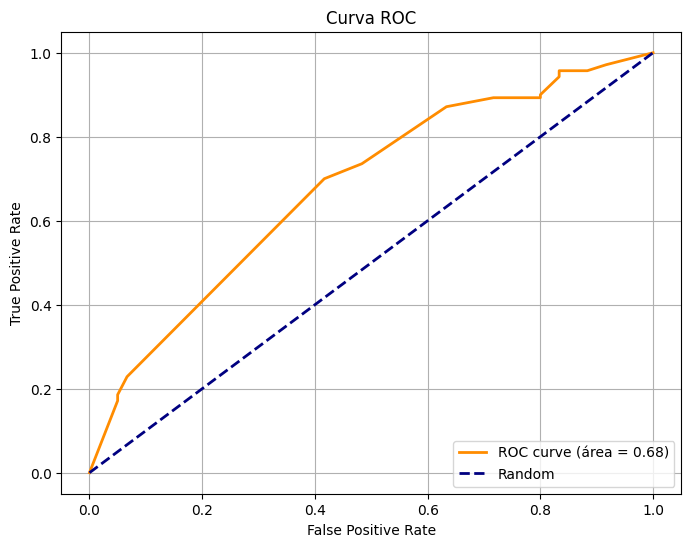

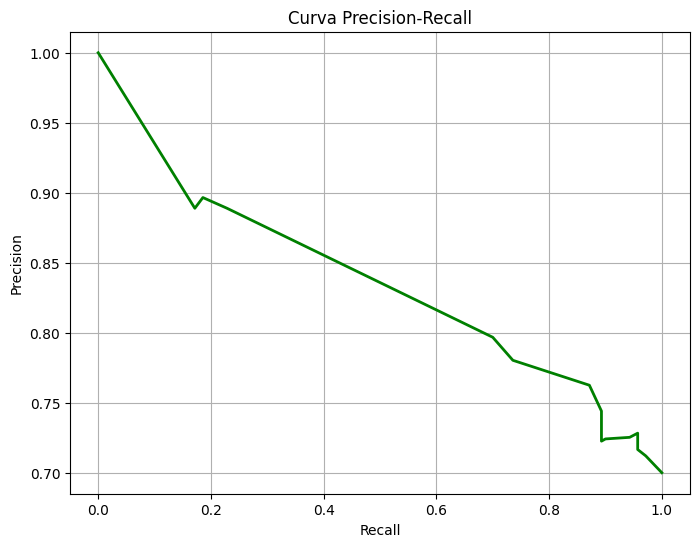

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
# Melhor modelo treinado
best_model = random_search.best_estimator_

y_proba = best_model.predict_proba(X_test)[:, 1]

y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)

fpr, tpr, threshold = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test_numeric, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

#### ROC e F1 score do caso base

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

# Previsões
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para classe positiva


# Métricas
f1 = f1_score(y_test, y_pred, pos_label='good')  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

F1-score: 0.8065
ROC AUC: 0.6794


#### Matriz de confusão

In [ ]:
y_pred_numeric = np.where(y_pred == 'good', 1, 0)


In [ ]:
from sklearn.metrics import confusion_matrix

# Matriz de confusão
cm = confusion_matrix(y_test_numeric, y_pred_numeric)  # y_test = valores reais, y_test_pred = predições
print(cm)

[[ 15  45]
 [ 15 125]]


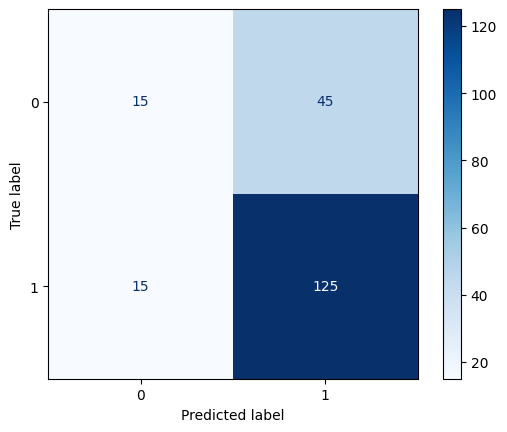

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# [[TN  FP]
#  [FN  TP]]

---
# Pre processamento
Agora que temos uma noção de como o modelo está indo sem o pre processamento, vamos faze-lo visando aumentar o recall e a precisão e avaliar com o caso anterior a area under curve (auc) do ROC do modelo anterior e saber se as alterações melhoraram ou não o caso mais simples. O modelo anterior servirá como métrica, se algum passo de pré processamento piorar o f1 score ou roc score retornamos o passo anterior e trocamos o processo.


#### estratificacao

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X = pd.read_csv('class_german_credit.csv')
y = X['Risk']
X = X.drop('Risk', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=0)

## Breve analise exploratória
---

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 355 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   657 non-null    object
 5   Checking account  486 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
dtypes: int64(4), object(5)
memory usage: 62.5+ KB


job é um atributo que está como inteiro mas é ordinal, teremos que usar ordinal encoder antes de tirar qualquer conclusão com ele. Colocarei job como ordinal nas etapas de seleção de variáveis e nos testes dentro dos pipelines.

In [ ]:
X_train.describe()

,Age,Job,Credit amount,Duration
count,800.000000,800.000000,800.000000,800.000000
mean,35.438750,1.895000,3247.860000,20.916250
std,11.475991,0.645752,2775.170745,11.997465
min,19.000000,0.000000,276.000000,4.000000
25%,27.000000,2.000000,1363.250000,12.000000
50%,33.000000,2.000000,2281.500000,18.000000
75%,42.000000,2.000000,3965.250000,24.000000
max,75.000000,3.000000,15945.000000,72.000000


Podemos simplesmente ignorar o que describe diz sobre job, pois é um atributo ordinal que está sendo tratado como numérico

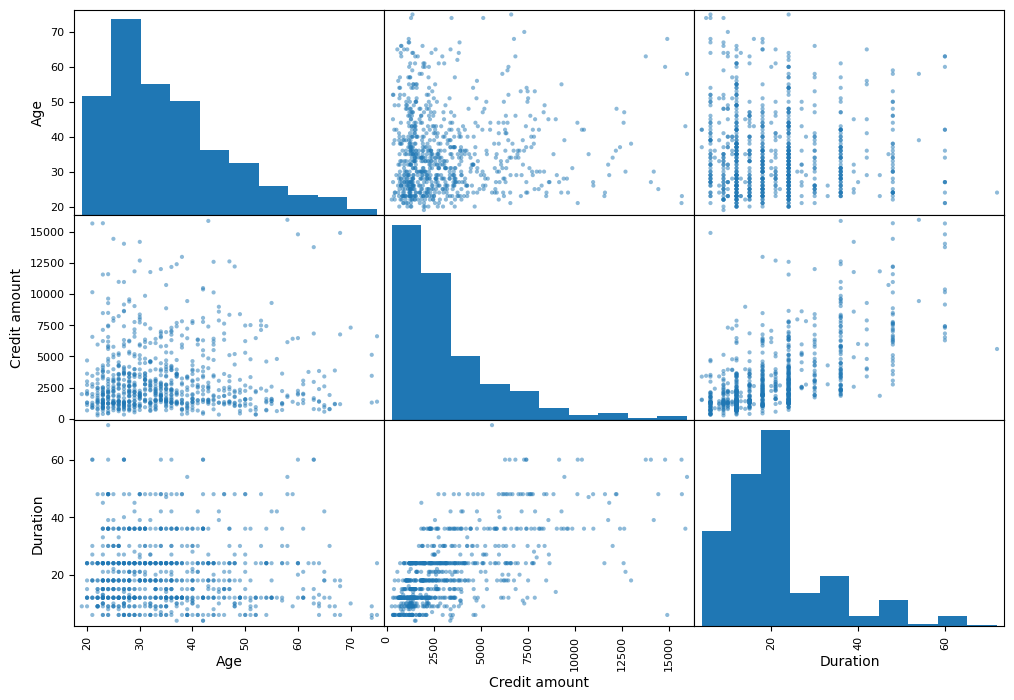

In [ ]:
from pandas.plotting import scatter_matrix
atributes = ["Age", "Credit amount", "Duration"]
scatter_matrix(X_train[atributes], figsize=(12, 8))
plt.show()

In [ ]:
numeric_columns = ['Age', 'Credit amount', 'Duration']
ordinal_columns = ['Saving accounts', 'Checking account']
nominal_columns = ['Sex', 'Housing', 'Purpose']
categories_order = [['little', 'moderate', 'quite rich', 'rich']]



Podemos perceber uma cauda alongada a direita em age, credit amount e Duration, tendo em vista isso, podemos além de normalizar os dados numericos, tambem aplicar uma transformação log.


Por mais que isso teoricamente seja eficaz, na prática isso se mostrou o contrário (Testes com log atrapalharam meu resultado). Portanto, a única transformação que manterei sera a normalização para não afetar KNN, Smote e outros métodos que valores discrepantes possam atrapalhar.


É possível perceber que nenhum dos dados segue a normal, todos estão longe da normalidade. Isso será provado com teste na parte de seleção de variáveis.


---
## Remoção de outliers

In [ ]:
##Remover outliers com base no iqr
#Principais atributos com outliers: Age, Credit amount, Duration
import pandas as pd

def remove_outliers_iqr(df, columns):
    """
    Remove registros com outliers com base no IQR para as colunas especificadas.
    """
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.8 * IQR #1.8 pois temos muito pouco dados
        upper_bound = Q3 + 1.8 * IQR

        # Mantém apenas os registros dentro dos limites
        df_clean.loc[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound), col] = np.nan

    return df_clean

    # num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [ ]:
X_train_clean = X_train.copy()
train_clean = X_train_clean = remove_outliers_iqr(X_train, numeric_columns)


### Treino do baseline + remoção de outliers e normalização em dados numéricos.

In [ ]:
job_categories = [0, 1, 2, 3]
ordinal_transformer = OrdinalEncoder(categories=[job_categories])
ord_preprocessor = Pipeline([
    ('encoder', ordinal_transformer)
])

from sklearn.preprocessing import FunctionTransformer, StandardScaler
scaler_transformer = StandardScaler()

num_preprocessor = Pipeline([
    ('scaler', scaler_transformer),
    ('imputer', KNNImputer(n_neighbors=5))
])

nom_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

param_dist = {
    'clf__max_depth': [None, 3, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy', 'log_loss']
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_clean, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer())]),
                                                                               ['Age',
                                                                                'Credit '
                                                                                'amount',
                                                                                'Duration']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OrdinalEncoder(categories=[[0,
                                                                                                                            1,
                                                                                                                            2,
                                                                                                                            3]]))]),
                                                                               ['Job']),
                                                                              ('nom',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encod...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Sex',
                                                                                'Housing',
                                                                                'Saving '
                                                                                'accounts',
                                                                                'Checking '
                                                                                'account',
                                                                                'Purpose'])])),
                                             ('clf',
                                              DecisionTreeClassifier(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'clf__criterion': ['gini', 'entropy',
                                                           'log_loss'],
                                        'clf__max_depth': [None, 3, 5, 10, 20],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='roc_auc')

In [ ]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  #Probabilidades para classe positiva

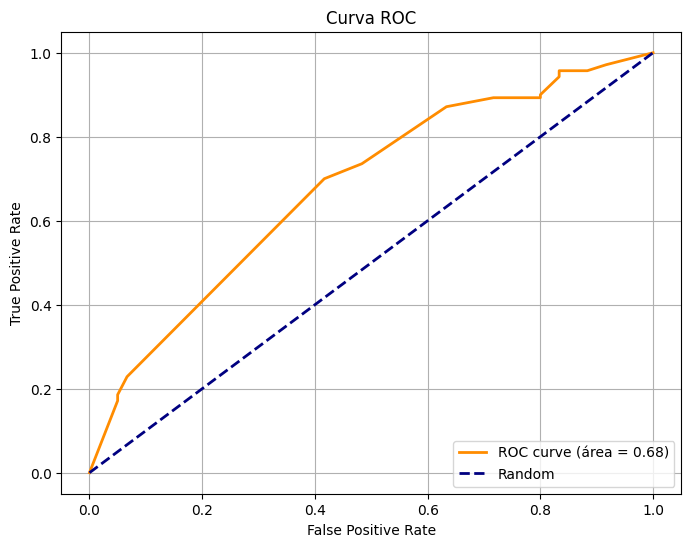

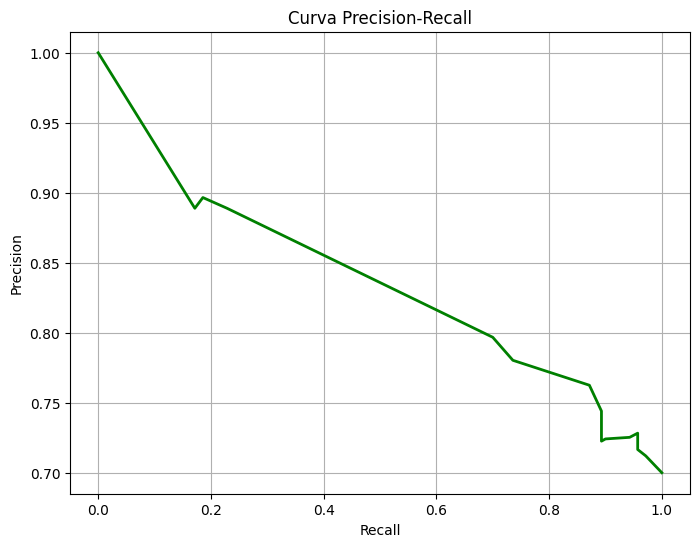

In [ ]:
best_model = random_search.best_estimator_
y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)

fpr, tpr, threshold = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test_numeric, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score


# Métricas
f1 = f1_score(y_test, y_pred, pos_label='good')  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

F1-score: 0.8065
ROC AUC: 0.6794


Foi analisado o resultado retirando os outliers usando iqr com vários valores
1.5, 1.8... através de desvio padrão também, porém qualquer remoção de outlier demonstrou ter um efeito ruim em todos os casos, o que teve o melhor valor foi usando 1.8 como constante.

como foi feita:

Transformei os dados numéricos que são outliers em NaN's e usei um imputer para dados numéricos, porém como dito, teve um resultado pior.


---
## Agrupamento
A variável purpose tem os atributos domestic appliance e repairs com pouca ocorrência, portanto juntei a categoria domestic appliances em furniture/equipament, agrupei também repairs em vacation/other. O que semânticamente tem conexão.

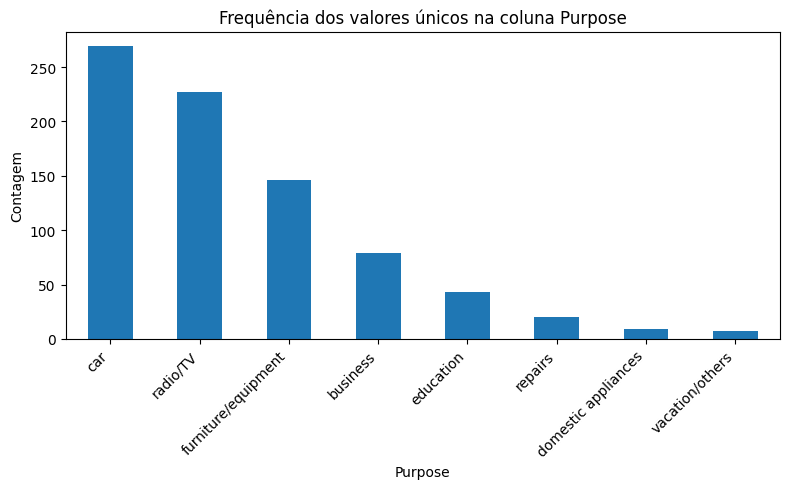

In [ ]:
counts = X_train['Purpose'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8,5))
counts.plot(kind='bar')

plt.title('Frequência dos valores únicos na coluna Purpose')
plt.xlabel('Purpose')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')  # Deixa os nomes inclinados para facilitar leitura
plt.tight_layout()  # Ajusta layout para não cortar texto

plt.show()

In [ ]:
def agrupar_purpose(valor):
    if valor == 'domestic appliances':
        return 'furniture/equipment'
    elif valor in ['repairs', 'vacation/others']:
        return 'vacation/others'
    else:
        return valor


In [ ]:
X_train_grouped = X_train.copy()
X_train_grouped['Purpose'] = X_train['Purpose'].apply(agrupar_purpose)

In [ ]:
X_train_grouped['Purpose'].unique()

array(['car', 'business', 'radio/TV', 'furniture/equipment', 'education',
       'vacation/others'], dtype=object)

In [ ]:
X_test_grouped = X_test.copy()
X_test_grouped['Purpose'] = X_test['Purpose'].apply(agrupar_purpose)

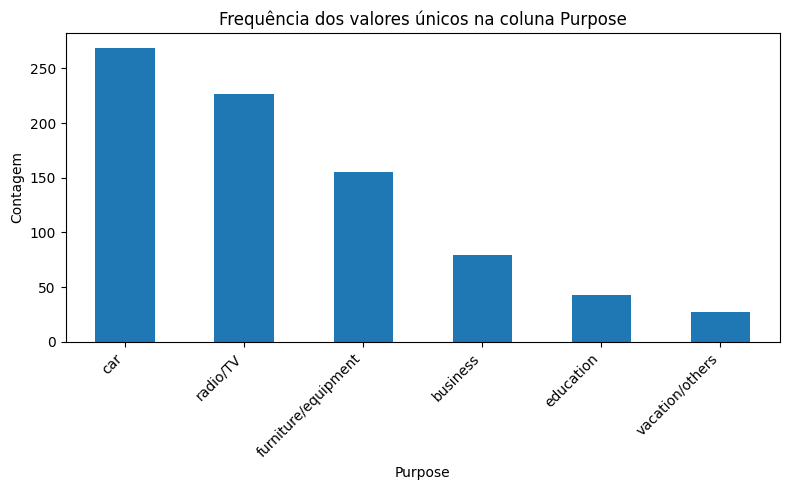

In [ ]:
counts = X_train_grouped['Purpose'].value_counts()

# Plotar gráfico de barras
plt.figure(figsize=(8,5))
counts.plot(kind='bar')

plt.title('Frequência dos valores únicos na coluna Purpose')
plt.xlabel('Purpose')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')  # Deixa os nomes inclinados para facilitar leitura
plt.tight_layout()  # Ajusta layout para não cortar texto

plt.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 355 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Job               800 non-null    int64 
 3   Housing           800 non-null    object
 4   Saving accounts   657 non-null    object
 5   Checking account  486 non-null    object
 6   Credit amount     800 non-null    int64 
 7   Duration          800 non-null    int64 
 8   Purpose           800 non-null    object
dtypes: int64(4), object(5)
memory usage: 62.5+ KB


---

## Imputer's


Usarei principalmente 2 tipos de imputação

- para treinar modelos baseados em arvores escolherei randomForestRegressor sem arredondamento (deixarei as arvores discretizarem os dados - mesmo que eles sejam ordinais). Isso demonstrou ter um ganho significativo em relação à moda, knn e outros tipos de imputação.

- para treinar modelos que não são baseados em árvore usarei randomForestRegressor com arredondamento (foi mais eficiente que um randomForestClassifier). Álem disso para a seleção de variáveis usarei uma base imputada dessa forma, pois os métodos dependem que os números representem as classes [0, 1, 2, 3] = ['little', 'moderate', 'quite rich', 'rich'], portanto, devem ser atributos inteiros de 0 à 3

Escolhi esses 2 métodos, pois testei com knnImputer, moda e outros métodos, porém todos tiveram um desempenho ruim.




### Imputer 1.0
- agrupamento do atributo Purpose.
- Remocao dos Nan's dos atributos Saving accounts e Checking account com random forest regressor sem arredondamento
- normalização de dados numéricos
- Sem remoção de outliers

A ideia de não usar arredondamento ou não usar o randomForestClassifier para imputação é de permitir que modelos baseados em árvores fação sua própria descritização do dado. Teoricamente isso não seria uma boa alternativa, porém os testes demonstraram o contrário.

In [ ]:
numeric_columns = ['Age', 'Credit amount', 'Duration']
ordinal_columns = ['Saving accounts', 'Checking account']
nominal_columns = ['Sex', 'Housing', 'Purpose']
categories_order = [['little', 'moderate', 'quite rich', 'rich']]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
  ('scaler', StandardScaler()),
])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier


categories_saving_accounts = ['little', 'moderate', 'quite rich', 'rich']
categories_checking_account = ['little', 'moderate', 'rich']
list_of_category_orders = [categories_saving_accounts, categories_checking_account]

ordinal_encoder_for_imputation = OrdinalEncoder(
    categories=list_of_category_orders,
    handle_unknown='use_encoded_value', #Lida com valores desconhecidos no futuro
    unknown_value=np.nan #Mapeia desconhecidos para NaN, para que o imputer os trate
)

iter_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=15, random_state=42), # Exemplo
    max_iter=15,
    random_state=42,
    initial_strategy='most_frequent'
)


ordinal_pipeline = Pipeline([
    ('encoder', ordinal_encoder_for_imputation),
    ('imputer', iter_imputer)
])

ohe = OneHotEncoder(handle_unknown='ignore')

nominal_pipeline = Pipeline([
    ('encoder', ohe)
])



In [ ]:
preprocessor1 = ColumnTransformer([
    ('num', numeric_pipeline, numeric_columns),
    ('ord', ordinal_pipeline, ordinal_columns),
    ('nom', nominal_pipeline, nominal_columns),
    ('Job', 'passthrough', ['Job'])
])

In [ ]:
param_dist = {
    'clf__max_depth': [None, 3, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4,],
    'clf__criterion': ['gini', 'entropy'],

}


pipeline1 = Pipeline([
    ('preprocess', preprocessor1),
    ('clf', DecisionTreeClassifier(random_state=0))
])


random_search = RandomizedSearchCV(
    pipeline1,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=0
)

random_search.fit(X_train_grouped, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Credit '
                                                                                'amount',
                                                                                'Duration']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OrdinalEncoder(categories=[['little',
                                                                                                                            'moderate',
                                                                                                                            'quite '
                                                                                                                            'rich',
                                                                                                                            'rich'],
                                                                                                                           ['little',
                                                                                                                            'moderate',
                                                                                                                            'rich']],
                                                                                                               handle_unknown='use_encoded_va...
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Sex',
                                                                                'Housing',
                                                                                'Purpose']),
                                                                              ('Job',
                                                                               'passthrough',
                                                                               ['Job'])])),
                                             ('clf',
                                              DecisionTreeClassifier(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'clf__criterion': ['gini', 'entropy'],
                                        'clf__max_depth': [None, 3, 5, 10, 20],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10]},
                   random_state=0, scoring='roc_auc')

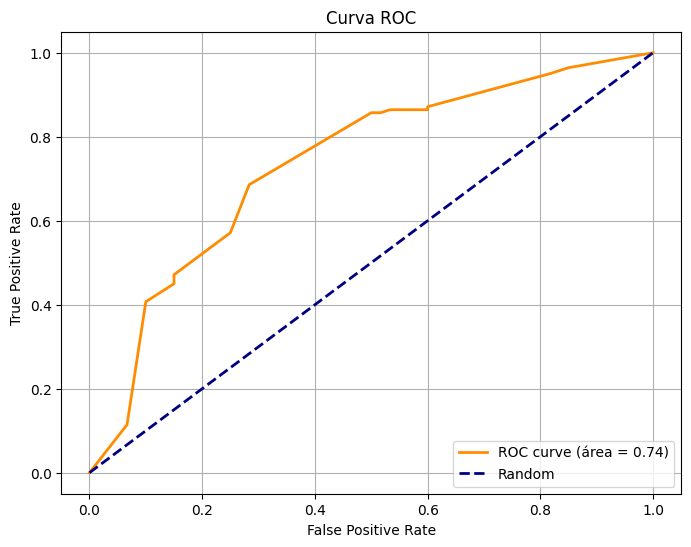

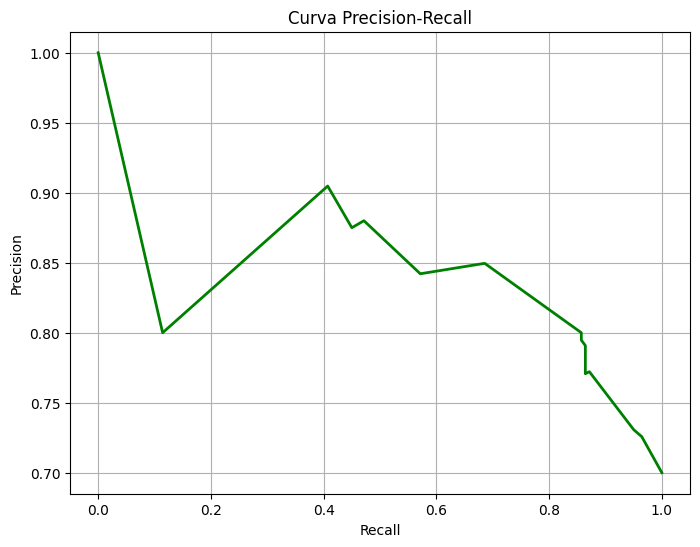

In [ ]:
best_model = random_search.best_estimator_
y_proba = best_model.predict_proba(X_test_grouped)[:, 1]

y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)

fpr, tpr, threshold = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test_numeric, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para classe positiva

f1 = f1_score(y_test, y_pred, pos_label='good')  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")


F1-score: 0.8148
ROC AUC: 0.7370


### Imputer 1.1
- agrupamento do atributo Purpose.
- preenchimento dos Nan's dos atributos Saving accounts e Checking account com um random forest regressor com arredondamento
- normalização de dados numéricos
- Sem remoção de outliers

Por mais que não arredondar posso ter um resultado melhor, para a etapa de seleção de variáveis é necessário manter a coerência dos dados.

In [ ]:
numeric_columns = ['Age', 'Credit amount', 'Duration']
ordinal_columns = ['Saving accounts', 'Checking account']
nominal_columns = ['Sex', 'Housing', 'Purpose']
categories_order = [['little', 'moderate', 'quite rich', 'rich']]



In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline([
  ('scaler', StandardScaler()),
])


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer

iter_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=15, random_state=42), # Exemplo
    max_iter=15,
    random_state=42,
    initial_strategy='most_frequent'
)

categories_saving_accounts = ['little', 'moderate', 'quite rich', 'rich']
categories_checking_account = ['little', 'moderate', 'rich']

list_of_category_orders = [categories_saving_accounts, categories_checking_account]

ordinal_encoder_for_imputation = OrdinalEncoder(
    categories=list_of_category_orders,
    handle_unknown='use_encoded_value', #Lida com valores desconhecidos no futuro
    unknown_value=np.nan #Mapeia desconhecidos para NaN, para que o imputer os trate
)


rounder = FunctionTransformer(lambda X: np.round(X), feature_names_out='one-to-one')

ordinal_pipeline = Pipeline([
    ('encoder', ordinal_encoder_for_imputation),
    ('imputer', iter_imputer),
    ('rounder', rounder)
])


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
# ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# target = TargetEncoder()

nominal_pipeline = Pipeline([
    ('encoder', ohe)
])



In [ ]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_columns),
    ('ord', ordinal_pipeline, ordinal_columns),
    ('nom', nominal_pipeline, nominal_columns),
    ('Job', 'passthrough', ['Job'])
])

In [ ]:
param_dist = {
    'clf__max_depth': [None, 3, 5, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4,],
    'clf__criterion': ['gini', 'entropy'],

    # Hiperparâmetros do IterativeImputer
    'preprocess__ord__imputer__max_iter': [5, 10, 15],
    'preprocess__ord__imputer__estimator__n_estimators': [5, 10, 20],
}


pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=0))
])


random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=0
)

random_search.fit(X_train_grouped, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Age',
                                                                                'Credit '
                                                                                'amount',
                                                                                'Duration']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OrdinalEncoder(categories=[['little',
                                                                                                                            'moderate',
                                                                                                                            'quite '
                                                                                                                            'rich',
                                                                                                                            'rich'],
                                                                                                                           ['little',
                                                                                                                            'moderate',
                                                                                                                            'rich']],
                                                                                                               handle_unknown='use_encoded_va...
                                              DecisionTreeClassifier(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'clf__criterion': ['gini', 'entropy'],
                                        'clf__max_depth': [None, 3, 5, 10, 20],
                                        'clf__min_samples_leaf': [1, 2, 4],
                                        'clf__min_samples_split': [2, 5, 10],
                                        'preprocess__ord__imputer__estimator__n_estimators': [5,
                                                                                              10,
                                                                                              20],
                                        'preprocess__ord__imputer__max_iter': [5,
                                                                               10,
                                                                               15]},
                   random_state=0, scoring='roc_auc')

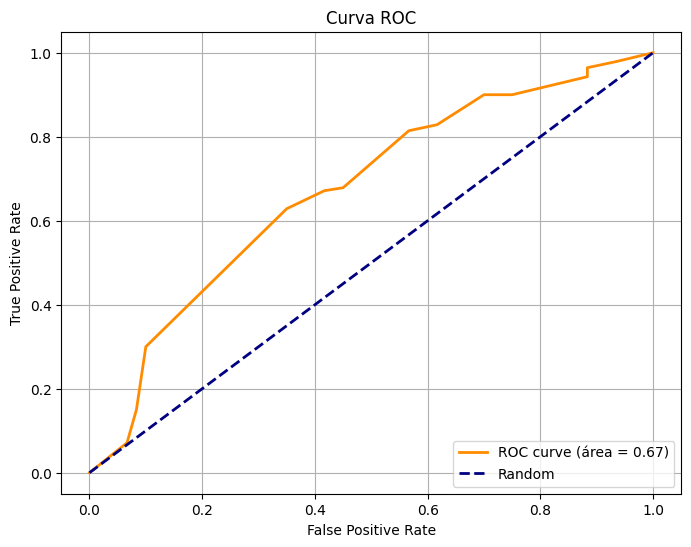

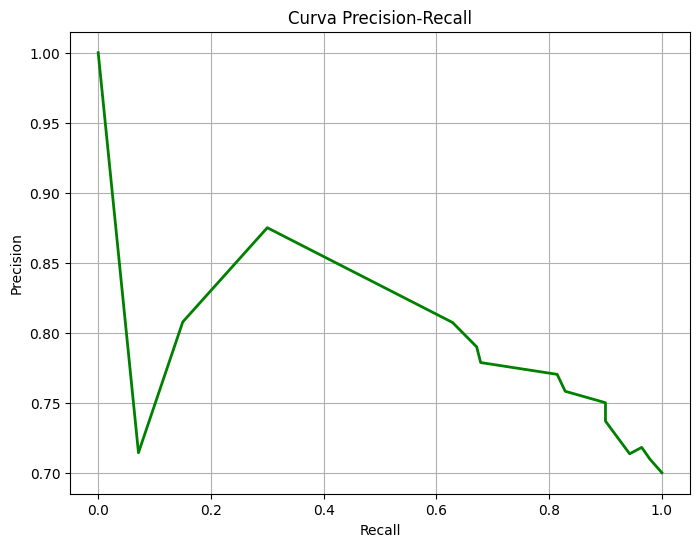

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

best_model = random_search.best_estimator_
y_proba = best_model.predict_proba(X_test_grouped)[:, 1]

y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)

fpr, tpr, threshold = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Also convert y_test for the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_numeric, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades para classe positiva

f1 = f1_score(y_test, y_pred, pos_label='good')  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")


F1-score: 0.8103
ROC AUC: 0.6724


In [ ]:
X_transformed = preprocessor.fit_transform(X_train_grouped)

In [ ]:
from sklearn.compose import make_column_selector as selector

ordinal_names = ordinal_columns
nominal_feature_names = preprocessor.named_transformers_['nom']['encoder'].get_feature_names_out(nominal_columns)
numeric_names = numeric_columns
remainder_names = ['Job']

all_feature_names = np.concatenate([numeric_names, ordinal_names, nominal_feature_names, remainder_names])

X_train_transformed = pd.DataFrame(X_transformed, columns=all_feature_names, index=X_train_clean.index)
X_train_transformed.head()


,Age,Credit amount,Duration,Saving accounts,Checking account,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_vacation/others,Job
355,-1.084571,-0.721798,0.257194,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
661,-1.084571,-0.846553,-0.743643,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
300,1.618410,-0.928761,-1.244061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
916,-0.299835,-0.144175,-0.910449,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
294,0.920867,1.579680,2.258868,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 355 to 439
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          800 non-null    float64
 1   Credit amount                800 non-null    float64
 2   Duration                     800 non-null    float64
 3   Saving accounts              800 non-null    float64
 4   Checking account             800 non-null    float64
 5   Sex_female                   800 non-null    float64
 6   Sex_male                     800 non-null    float64
 7   Housing_free                 800 non-null    float64
 8   Housing_own                  800 non-null    float64
 9   Housing_rent                 800 non-null    float64
 10  Purpose_business             800 non-null    float64
 11  Purpose_car                  800 non-null    float64
 12  Purpose_education            800 non-null    float64
 13  Purpose_furniture/equip

---
## Balanceamento do treinamento

In [ ]:
##Verificar balanceamento do dataset de treino
def percentual_categorias_onehot(df_onehot):
    """
    Recebe um DataFrame já transformado com OneHotEncoder.
    Retorna o percentual de cada categoria (coluna) com base na soma dos 1s.
    """
    total = len(df_onehot)
    print(df_onehot.sum(axis=0))

    percentuais = (df_onehot.sum(axis=0) / total) * 100
    return percentuais.sort_values(ascending=False).round(2)


In [ ]:
percentual_categorias_onehot(pd.get_dummies(y_train))

bad     240
good    560
dtype: int64


,0
good,70.0
bad,30.0


Os dados estão em um proporção de 70 - 30, sabendo disso podemos usar smote e tomek link

### Para o balancemento usarei Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTE NC) com tomek link.

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTEENN

smotenc = SMOTENC(
        # categorical_features=[3, 4, 5, 6, 7, 8],
        categorical_features=[5,6,7,8,9,10,11,12,13,14,15, 16],
        sampling_strategy=0.6667,
        random_state=42
    )

resampler = SMOTETomek(
    smote= smotenc,
    random_state=42
)

# resampler = SMOTEENN(
#     smote=smotenc,
#     random_state=42
# )
X_train_resampled, y_train_resampled = resampler.fit_resample(X_train_transformed, y_train)


In [ ]:
X_train_resampled = pd.DataFrame(X_train_resampled, columns=all_feature_names)

In [ ]:
y_train_resampled = pd.Series(y_train_resampled)

In [ ]:
X_train_resampled.head()

,Age,Credit amount,Duration,Saving accounts,Checking account,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_vacation/others,Job
0,-1.084571,-0.721798,0.257194,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.084571,-0.846553,-0.743643,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,1.618410,-0.928761,-1.244061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.299835,-0.144175,-0.910449,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,0.920867,1.579680,2.258868,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          825 non-null    float64
 1   Credit amount                825 non-null    float64
 2   Duration                     825 non-null    float64
 3   Saving accounts              825 non-null    float64
 4   Checking account             825 non-null    float64
 5   Sex_female                   825 non-null    float64
 6   Sex_male                     825 non-null    float64
 7   Housing_free                 825 non-null    float64
 8   Housing_own                  825 non-null    float64
 9   Housing_rent                 825 non-null    float64
 10  Purpose_business             825 non-null    float64
 11  Purpose_car                  825 non-null    float64
 12  Purpose_education            825 non-null    float64
 13  Purpose_furniture/eq

In [ ]:
percentual_categorias_onehot(pd.get_dummies(y_train_resampled))

bad     319
good    506
dtype: int64


,0
good,61.33
bad,38.67


---
## Teste 2 - usando SMOTE para imputacao de dados
observe que escolhi balancear 60 - 40 ao inves de 50-50.

- SMOTE NC
- agrupamento de purpose
- Remocao dos Nan's dos atributos Saving accounts e Checking account
- Sem remoção de outlier
- normalização de dados numéricos

In [ ]:
X_train_grouped.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
355,23,male,1,own,little,moderate,1246,24,car
661,23,male,2,own,NaN,little,900,12,car
300,54,female,0,own,little,NaN,672,6,car
916,32,male,2,own,moderate,NaN,2848,10,car
294,46,male,3,own,NaN,NaN,7629,48,business


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline2 = ImbPipeline([
    ('preprocess', preprocessor),
    ('resample', SMOTENC(
            # categorical_features=[3, 4, 5, 6, 7, 8],
            # categorical_features=[1, 2, 3, 4, 5, 8],
            categorical_features=[3, 4, 5,6,7,8,9,10,11,12,13,14,15,16],
            # categorical_features=[1,2,3,4,5,8]
            sampling_strategy=0.6667,
            random_state=42
        )
    ),

  ('clf', DecisionTreeClassifier(random_state=0))
])


In [ ]:
X_transformed.shape

(800, 17)

In [ ]:


from imblearn.pipeline import Pipeline


param_dist = {
    'clf__max_depth': [None, 3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy'],

    # IterativeImputer: se quiser otimizar junto
    'preprocess__ord__imputer__max_iter': [5, 10, 15],
    'preprocess__ord__imputer__estimator__n_estimators': [5, 10, 20],

    # SMOTENC: número de vizinhos no oversampling
    'resample__k_neighbors': [3, 5, 7]
}

search = RandomizedSearchCV(
    pipeline2,
    param_distributions=param_dist,
    n_iter=100,
    scoring={
        'roc_auc': 'roc_auc',
        # 'f1': make_scorer(f1_score)
    },
    refit='roc_auc',
    cv=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train_grouped, y_train)

print(search.best_params_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'resample__k_neighbors': 7, 'preprocess__ord__imputer__max_iter': 15, 'preprocess__ord__imputer__estimator__n_estimators': 20, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 4, 'clf__max_depth': 3, 'clf__criterion': 'gini'}


In [ ]:
search.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Credit amount',
                                                   'Duration']),
                                                 ('ord',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(categories=[['little',
                                                                                               'moderate',
                                                                                               'quite '
                                                                                               'rich',
                                                                                               'rich'],
                                                                                              ['little',
                                                                                               'moderate',
                                                                                               'rich']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer',...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Housing',
                                                   'Purpose']),
                                                 ('Job', 'passthrough',
                                                  ['Job'])])),
                ('resample',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                               13, 14, 15, 16],
                         k_neighbors=3, random_state=42,
                         sampling_strategy=0.6667)),
                ('clf',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=0))])

#### Sobre o resultado
O resultado piora um pouco ao usar smote + tomeklink, porém fiz testes sem eles, e depois da seleção de variáveis smote + tomek trouxe um resultado melhor em comparação com os dados sem balancear. Não foi demonstrado isso através de testes, pois poluiria muito a visualização dos resultados dentro do notebook. Tendo em vista que teria que fazer 2 ramos para o trabalho apartir daqui.

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
X_test_group = X_test.copy()
X_test_group['Purpose'] = X_test_group['Purpose'].apply(agrupar_purpose)
best_model = search.best_estimator_
y_pred = best_model.predict(X_test_group)
y_proba = best_model.predict_proba(X_test_group)[:, 1]


f1 = f1_score(y_test, y_pred, pos_label='good')  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")


F1-score: 0.8208
ROC AUC: 0.7238


Mateus, não sei o sobre qual base está usando o SMOTE. mas pareced que piorou...

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obter o melhor modelo
best_model = search.best_estimator_

# Prever probabilidades e classes
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# Converter y_test para numérico
y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)

# 1. Curva ROC
fpr, tpr, threshold = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 2. Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test_numeric, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

# Converter y_pred para os mesmos valores numéricos que y_test_numeric
y_pred_numeric = np.where(y_pred == 'good', 1, 0)

# Usar y_pred_numeric em vez de y_pred nas métricas
cm = confusion_matrix(y_test_numeric, y_pred_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.show()
# # Opcional: Imprimir métricas adicionais
# from sklearn.metrics import classification_report
# print("\nRelatório de Classificação:")
# print(classification_report(y_test_numeric, y_pred, target_names=['bad', 'good']))

---
---
# Seleção de variáveis
---
---

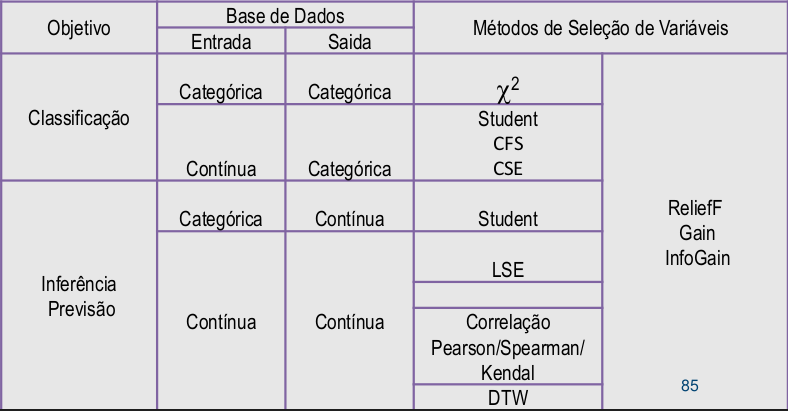

In [ ]:
## RESUMO DE ALGORITMOS PARA SELEÇÃO DE VARIÁVEIS
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('resumo.png')
cv2_imshow(img)

##Dataset de treino final e dataset para seleção de feature
Separei em 2 datasets diferentes o que será utilizado para treino de fato com onehotencode, smote, ordinalencode... e outro para selecao de feature que não podemos ter os atributos com onehotencode.

TESTAR SEM SMOTE A SELEÇÃO DE VARIAVEIS

In [ ]:
smote_tomek_transformer = SMOTETomek(
    smote=SMOTENC(
        categorical_features=[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
        sampling_strategy=0.6667, # Ou a estratégia desejada
        random_state=42
    ),
    random_state=42
)

transformation_pipeline = ImbPipeline([
    ('preprocess', preprocessor),          # Seu ColumnTransformer
    ('resample', smote_tomek_transformer)  # Seu SMOTETomek configurado
])

# X_train_transformed, y_train_transformed = transformation_pipeline.fit_resample(X_train_grouped, y_train)

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

# Pipeline já criado
X_train_transformed, y_train_transformed = transformation_pipeline.fit_resample(X_train_grouped, y_train)

# Converter X_train_transformed para DataFrame
feature_names = transformation_pipeline.named_steps['preprocess'].get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)


In [ ]:
X_train_transformed_df.head()  # com OneHotEncoder aplicado


,num__Age,num__Credit amount,num__Duration,ord__Saving accounts,ord__Checking account,nom__Sex_female,nom__Sex_male,nom__Housing_free,nom__Housing_own,nom__Housing_rent,nom__Purpose_business,nom__Purpose_car,nom__Purpose_education,nom__Purpose_furniture/equipment,nom__Purpose_radio/TV,nom__Purpose_vacation/others,Job__Job
0,-1.084571,-0.721798,0.257194,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.084571,-0.846553,-0.743643,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,1.618410,-0.928761,-1.244061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.299835,-0.144175,-0.910449,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,0.920867,1.579680,2.258868,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
X_train_transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   num__Age                          825 non-null    float64
 1   num__Credit amount                825 non-null    float64
 2   num__Duration                     825 non-null    float64
 3   ord__Saving accounts              825 non-null    float64
 4   ord__Checking account             825 non-null    float64
 5   nom__Sex_female                   825 non-null    float64
 6   nom__Sex_male                     825 non-null    float64
 7   nom__Housing_free                 825 non-null    float64
 8   nom__Housing_own                  825 non-null    float64
 9   nom__Housing_rent                 825 non-null    float64
 10  nom__Purpose_business             825 non-null    float64
 11  nom__Purpose_car                  825 non-null    float64
 12  nom__Pur

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

X_train_transformed, y_train_transformed = transformation_pipeline.fit_resample(X_train_grouped, y_train)

feature_names = transformation_pipeline.named_steps['preprocess'].get_feature_names_out()
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names, index=y_train_transformed.index)

ohe_encoder = transformation_pipeline.named_steps['preprocess'].named_transformers_['nom'].named_steps['encoder']

ohe_cols = [col for col in feature_names if col.startswith('nom__')]

X_ohe_part = X_train_transformed[ohe_cols].copy()

X_ohe_inversed = ohe_encoder.inverse_transform(X_ohe_part.values)

X_ohe_inversed_df = pd.DataFrame(X_ohe_inversed, columns=nominal_columns, index=X_train_transformed.index)

X_train_without_ohe = X_train_transformed.drop(columns=ohe_cols)

X_train_without_ohe = pd.concat([X_train_without_ohe, X_ohe_inversed_df], axis=1)

print("DataFrame com OHE:", X_train_transformed.shape)
print("DataFrame com OHE invertido:", X_train_without_ohe.shape)


DataFrame com OHE: (825, 17)
DataFrame com OHE invertido: (825, 9)


In [ ]:
X_train_transformed.head()

,num__Age,num__Credit amount,num__Duration,ord__Saving accounts,ord__Checking account,nom__Sex_female,nom__Sex_male,nom__Housing_free,nom__Housing_own,nom__Housing_rent,nom__Purpose_business,nom__Purpose_car,nom__Purpose_education,nom__Purpose_furniture/equipment,nom__Purpose_radio/TV,nom__Purpose_vacation/others,Job__Job
0,-1.084571,-0.721798,0.257194,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.084571,-0.846553,-0.743643,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,1.618410,-0.928761,-1.244061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.299835,-0.144175,-0.910449,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,0.920867,1.579680,2.258868,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
def remover_prefixos_colunas(df, prefixos):
    """
    Remove os prefixos dados de cada nome de coluna de um DataFrame.

    Exemplo: 'num__Age' → 'Age'
    """
    novo_nome_colunas = [
        col.split("__", 1)[1] if any(col.startswith(prefix + "__") for prefix in prefixos) else col
        for col in df.columns
    ]
    df.columns = novo_nome_colunas
    return df


In [ ]:
# Lista de prefixos usados no seu ColumnTransformer
prefixos_usados = ['num', 'ord', 'Job']

# Aplica a renomeação
X_train_without_ohe = remover_prefixos_colunas(X_train_without_ohe, prefixos_usados)
prefixos_usados = ['num', 'ord', 'nom', 'Job']

X_train_transformed = remover_prefixos_colunas(X_train_transformed, prefixos_usados)

In [ ]:
X_train_transformed.head()

,Age,Credit amount,Duration,Saving accounts,Checking account,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_vacation/others,Job
0,-1.084571,-0.721798,0.257194,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.084571,-0.846553,-0.743643,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,1.618410,-0.928761,-1.244061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.299835,-0.144175,-0.910449,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,0.920867,1.579680,2.258868,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
X_train_without_ohe.head()

,Age,Credit amount,Duration,Saving accounts,Checking account,Job,Sex,Housing,Purpose
0,-1.084571,-0.721798,0.257194,0.0,1.0,1.0,male,own,car
1,-1.084571,-0.846553,-0.743643,0.0,0.0,2.0,male,own,car
2,1.618410,-0.928761,-1.244061,0.0,1.0,0.0,female,own,car
3,-0.299835,-0.144175,-0.910449,1.0,1.0,2.0,male,own,car
4,0.920867,1.579680,2.258868,0.0,0.0,3.0,male,own,business


In [ ]:
# Remove colunas OHE do DataFrame original
X_train_with_ohe = X_train_transformed_df.drop(columns=ohe_cols)

# Junta as colunas nominais decodificadas
X_train_with_ohe = pd.concat([X_train_with_ohe, X_ohe_inversed_df], axis=1)


---
---
## Avaliação de normalidade
---
---

In [ ]:
numeric_columns = ['Age', 'Credit amount', 'Duration']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histograma_colunas(df, colunas):

  for coluna in colunas:
    plt.figure(figsize=(10, 6))
    plt.figure(figsize=(10, 6))
    sns.histplot(df[coluna], kde=True)
    plt.title(f'Histograma da Coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()


<Figure size 1000x600 with 0 Axes>

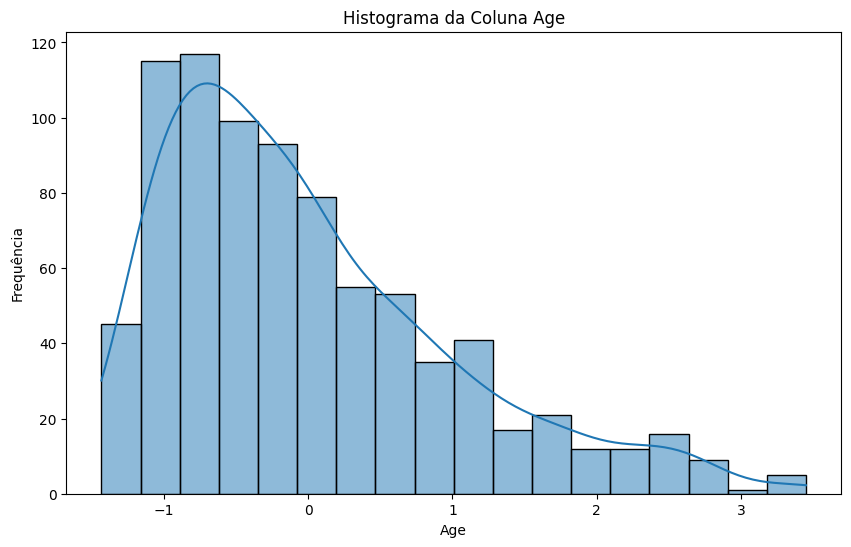

<Figure size 1000x600 with 0 Axes>

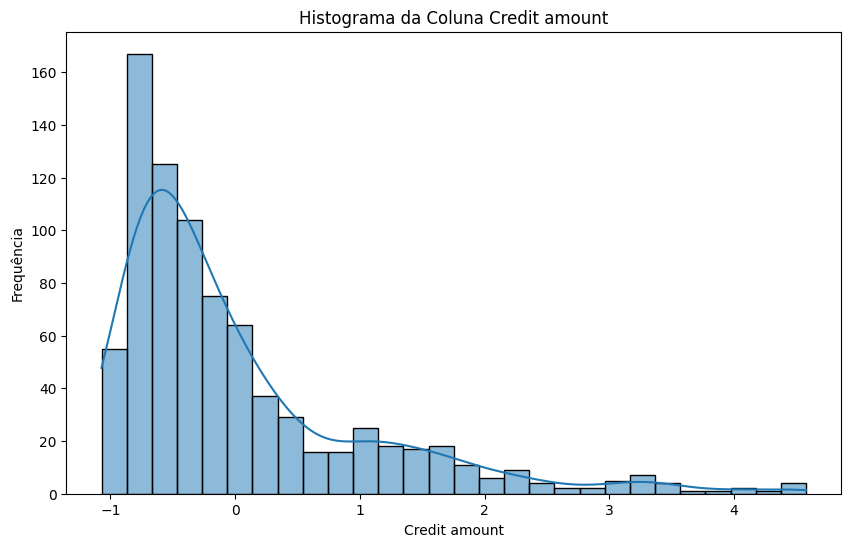

<Figure size 1000x600 with 0 Axes>

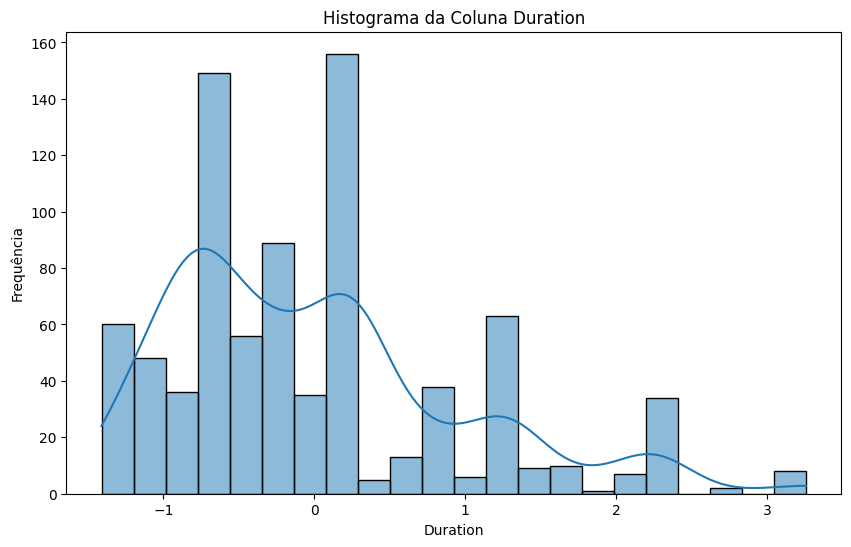

In [ ]:
histograma_colunas(X_train_without_ohe, numeric_columns)

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

def testar_normalidade_colunas_especificas(df: pd.DataFrame, colunas_para_testar: list, alpha: float = 0.05):

    lista_resultados = []

    for coluna in colunas_para_testar:

        dados = df[coluna].dropna()

        stat_sw, p_valor_sw = stats.shapiro(dados)
        decisao_sw = 'Normal' if p_valor_sw > alpha else 'Não Normal'

        stat_jb, p_valor_jb = stats.jarque_bera(dados)
        decisao_jb = 'Normal' if p_valor_jb > alpha else 'Não Normal'

        lista_resultados.append({
            'Variável': coluna,
            'P-Valor (Shapiro)': f"{p_valor_sw:.4f}",
            'Decisão (Shapiro)': decisao_sw,
            'P-Valor (Jarque-Bera)': f"{p_valor_jb:.4f}",
            'Decisão (Jarque-Bera)': decisao_jb
        })

    df_resultados = pd.DataFrame(lista_resultados)
    return df_resultados



In [ ]:
is_normal = testar_normalidade_colunas_especificas(X_train_without_ohe, colunas_para_testar=numeric_columns)

In [ ]:
is_normal

,Variável,P-Valor (Shapiro),Decisão (Shapiro),P-Valor (Jarque-Bera),Decisão (Jarque-Bera)
0,Age,0.0000,Não Normal,0.0000,Não Normal
1,Credit amount,0.0000,Não Normal,0.0000,Não Normal
2,Duration,0.0000,Não Normal,0.0000,Não Normal


###Dados longe da normalidade.
Nos impede de usar Pearson e de usar o teste t de Student.

###Para fazer a seleção de variáveis, não podemos ter colunas onehotencoded. Logo iremos criar uma cópia para trabalhar na seleção de variáveis

In [ ]:
X_train_variable_selection_ohe = X_train_transformed.copy()
X_train_variable_selection = X_train_without_ohe.copy()


### Algoritmos que serão usados
Como não temos normalidade não podemos usar nem Pearson nem teste t de Student, portanto usarei os seguintes algoritmos para avaliar as features:


- para categorica - categoria -> chi 2
- para continua - continua -> kendal (tal b)
- reliefF -> tabela toda
- mutual information -> tabela toda

---
## teste de χ²
## chi 2 -> categorica-categorica


In [ ]:
##Relatorio teste chi quadrado - baseado no codigo implementado no slide
import pandas as pd
from scipy.stats import chi2_contingency, chi2
from collections import Counter

def perform_chi2_test(input_series, output_series, alpha=0.05, feature_name="Variável de Entrada"):

    input_series = input_series.reset_index(drop=True)
    output_series = output_series.reset_index(drop=True)

    contingency_table = pd.crosstab(input_series, output_series)

    stat, p, dof, expected = chi2_contingency(contingency_table)

    print(f"\nGraus de Liberdade (dof): {dof}")

    prob = 1 - alpha
    critical_value = chi2.ppf(prob, dof)

    print(f"\nNível de significância (alpha): {alpha}")
    print(f"Valor crítico Qui-Quadrado: {critical_value:.4f}")
    print(f"Estatística Qui-Quadrado calculada (stat): {stat:.4f}")
    print("\nInterpretação baseada na Estatística do Teste vs. Valor Crítico:")

    if abs(stat) >= critical_value:
        print(f"Resultado: Dependentes (rejeitar H0). A estatística ({stat:.4f}) é >= valor crítico ({critical_value:.4f}).")
        print(f"Há uma associação estatisticamente significativa entre '{feature_name}' e a variável de saída.")
    else:
        print(f"Resultado: Independentes (falha em rejeitar H0). A estatística ({stat:.4f}) é < valor crítico ({critical_value:.4f}).")
        print(f"Não há evidência suficiente para dizer que '{feature_name}' e a variável de saída são dependentes.")

    print("\nInterpretação baseada no Valor-p:")
    print(f"Valor-p: {p:.4f}")
    if p <= alpha:
        print(f"Resultado: Dependentes (rejeitar H0). O valor-p ({p:.4f}) é <= alpha ({alpha}).")
        print(f"Há uma associação estatisticamente significativa entre '{feature_name}' e a variável de saída.")
    else:
        print(f"Resultado: Independentes (falha em rejeitar H0). O valor-p ({p:.4f}) é > alpha ({alpha}).")
        print(f"Não há evidência suficiente para dizer que '{feature_name}' e a variável de saída são dependentes.")


In [ ]:
perform_chi2_test(X_train_variable_selection['Purpose'], y_train_transformed, feature_name="Purpose")


Graus de Liberdade (dof): 5

Nível de significância (alpha): 0.05
Valor crítico Qui-Quadrado: 11.0705
Estatística Qui-Quadrado calculada (stat): 17.4972

Interpretação baseada na Estatística do Teste vs. Valor Crítico:
Resultado: Dependentes (rejeitar H0). A estatística (17.4972) é >= valor crítico (11.0705).
Há uma associação estatisticamente significativa entre 'Purpose' e a variável de saída.

Interpretação baseada no Valor-p:
Valor-p: 0.0036
Resultado: Dependentes (rejeitar H0). O valor-p (0.0036) é <= alpha (0.05).
Há uma associação estatisticamente significativa entre 'Purpose' e a variável de saída.


In [ ]:
perform_chi2_test(X_train_variable_selection['Housing'], y_train_transformed, feature_name="Housing")


Graus de Liberdade (dof): 2

Nível de significância (alpha): 0.05
Valor crítico Qui-Quadrado: 5.9915
Estatística Qui-Quadrado calculada (stat): 25.0764

Interpretação baseada na Estatística do Teste vs. Valor Crítico:
Resultado: Dependentes (rejeitar H0). A estatística (25.0764) é >= valor crítico (5.9915).
Há uma associação estatisticamente significativa entre 'Housing' e a variável de saída.

Interpretação baseada no Valor-p:
Valor-p: 0.0000
Resultado: Dependentes (rejeitar H0). O valor-p (0.0000) é <= alpha (0.05).
Há uma associação estatisticamente significativa entre 'Housing' e a variável de saída.


In [ ]:
perform_chi2_test(X_train_variable_selection['Sex'], y_train_transformed, feature_name="Sex")


Graus de Liberdade (dof): 1

Nível de significância (alpha): 0.05
Valor crítico Qui-Quadrado: 3.8415
Estatística Qui-Quadrado calculada (stat): 4.1074

Interpretação baseada na Estatística do Teste vs. Valor Crítico:
Resultado: Dependentes (rejeitar H0). A estatística (4.1074) é >= valor crítico (3.8415).
Há uma associação estatisticamente significativa entre 'Sex' e a variável de saída.

Interpretação baseada no Valor-p:
Valor-p: 0.0427
Resultado: Dependentes (rejeitar H0). O valor-p (0.0427) é <= alpha (0.05).
Há uma associação estatisticamente significativa entre 'Sex' e a variável de saída.


In [ ]:
# ord__Saving accounts	ord__Checking account

In [ ]:
perform_chi2_test(X_train_variable_selection['Job'], y_train_transformed, feature_name="Job")


Graus de Liberdade (dof): 3

Nível de significância (alpha): 0.05
Valor crítico Qui-Quadrado: 7.8147
Estatística Qui-Quadrado calculada (stat): 0.7610

Interpretação baseada na Estatística do Teste vs. Valor Crítico:
Resultado: Independentes (falha em rejeitar H0). A estatística (0.7610) é < valor crítico (7.8147).
Não há evidência suficiente para dizer que 'Job' e a variável de saída são dependentes.

Interpretação baseada no Valor-p:
Valor-p: 0.8588
Resultado: Independentes (falha em rejeitar H0). O valor-p (0.8588) é > alpha (0.05).
Não há evidência suficiente para dizer que 'Job' e a variável de saída são dependentes.


In [ ]:
perform_chi2_test(X_train_variable_selection['Checking account'], y_train_transformed, feature_name="Checking account")


Graus de Liberdade (dof): 36

Nível de significância (alpha): 0.05
Valor crítico Qui-Quadrado: 50.9985
Estatística Qui-Quadrado calculada (stat): 96.6152

Interpretação baseada na Estatística do Teste vs. Valor Crítico:
Resultado: Dependentes (rejeitar H0). A estatística (96.6152) é >= valor crítico (50.9985).
Há uma associação estatisticamente significativa entre 'Checking account' e a variável de saída.

Interpretação baseada no Valor-p:
Valor-p: 0.0000
Resultado: Dependentes (rejeitar H0). O valor-p (0.0000) é <= alpha (0.05).
Há uma associação estatisticamente significativa entre 'Checking account' e a variável de saída.


In [ ]:
perform_chi2_test(X_train_variable_selection['Saving accounts'], y_train_transformed, feature_name="Saving accounts")


Graus de Liberdade (dof): 24

Nível de significância (alpha): 0.05
Valor crítico Qui-Quadrado: 36.4150
Estatística Qui-Quadrado calculada (stat): 51.5140

Interpretação baseada na Estatística do Teste vs. Valor Crítico:
Resultado: Dependentes (rejeitar H0). A estatística (51.5140) é >= valor crítico (36.4150).
Há uma associação estatisticamente significativa entre 'Saving accounts' e a variável de saída.

Interpretação baseada no Valor-p:
Valor-p: 0.0009
Resultado: Dependentes (rejeitar H0). O valor-p (0.0009) é <= alpha (0.05).
Há uma associação estatisticamente significativa entre 'Saving accounts' e a variável de saída.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

def chi2_feature_selection(df, target, alpha=0.05):
    """
    Aplica o teste Qui-Quadrado para cada feature categórica de df em relação à variável target.
    Retorna uma Series booleana indicando se há dependência estatística (feature importante).
    """
    result = {}

    for column in df.columns:
        # Alinha índices
        x = df[column].reset_index(drop=True)
        y = target.reset_index(drop=True)

        # Tabela de contingência
        contingency_table = pd.crosstab(x, y)

        # Se a tabela for inválida (ex: uma coluna com único valor), pula
        if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
            result[column] = False
            continue

        try:
            stat, p, dof, expected = chi2_contingency(contingency_table)
            result[column] = p <= alpha  # True se dependente, False se independente
        except:
            # Em caso de erro numérico, considera não relevante
            result[column] = False

    return pd.Series(result, name="feature importante")


In [ ]:
X_cat = X_train_variable_selection[['Purpose', 'Housing', 'Sex', 'Job', 'Checking account', 'Saving accounts']]
y_cat = y_train_transformed

In [ ]:
X_cat.head()

,Purpose,Housing,Sex,Job,Checking account,Saving accounts
0,car,own,male,1.0,1.0,0.0
1,car,own,male,2.0,0.0,0.0
2,car,own,female,0.0,1.0,0.0
3,car,own,male,2.0,1.0,1.0
4,business,own,male,3.0,0.0,0.0


In [ ]:
y_cat.head()

,Risk
0,bad
1,bad
2,good
3,good
4,good


In [ ]:
importantes = chi2_feature_selection(X_cat, y_cat)
importantes

,feature importante
Purpose,True
Housing,True
Sex,True
Job,False
Checking account,True
Saving accounts,True


In [ ]:
def chi2_ranking_from_Xy(X, y, alpha=0.05):
    from scipy.stats import chi2_contingency, chi2
    import pandas as pd

    results = []

    for feature in X.columns:
        contingency = pd.crosstab(X[feature], y)
        stat, p, dof, expected = chi2_contingency(contingency)
        critical_value = chi2.ppf(1 - alpha, dof)
        reject_h0 = stat >= critical_value

        results.append({
            'Variável': feature,
            'Valor-p': p,
            'Estatística Qui²': stat,
            'Valor Crítico': critical_value,
            'Rejeita H₀?': 'Sim' if reject_h0 else 'Não'
        })

    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='Valor-p', ascending=True).reset_index(drop=True)
    return result_df


In [ ]:
chi2_ranking_from_Xy(X_cat, y_cat)


,Variável,Valor-p,Estatística Qui²,Valor Crítico,Rejeita H₀?
0,Checking account,1.901050e-07,96.615187,50.998460,Sim
1,Housing,3.587064e-06,25.076353,5.991465,Sim
2,Saving accounts,9.049158e-04,51.514006,36.415029,Sim
3,Purpose,3.647270e-03,17.497204,11.070498,Sim
4,Sex,4.269531e-02,4.107425,3.841459,Sim
5,Job,8.587661e-01,0.761020,7.814728,Não


---
## Avaliando a redundancia das variaveis de entrada continua - continua
## Kendall tau b

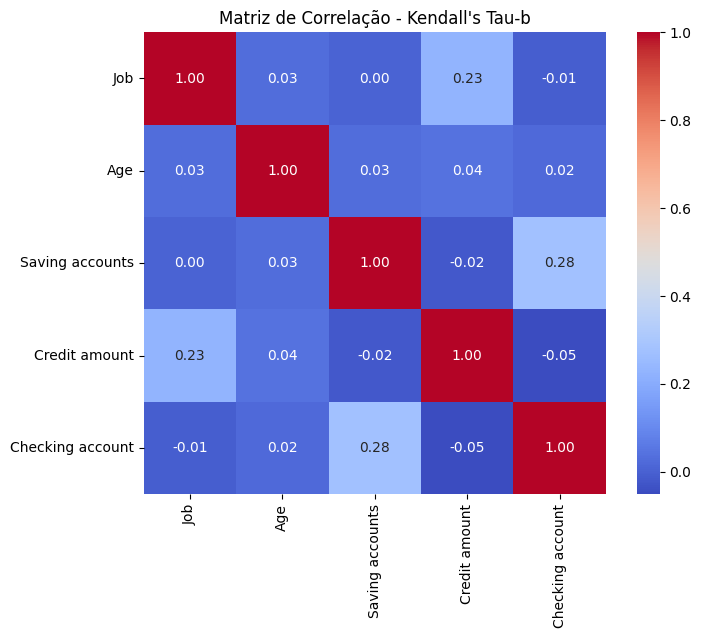

In [ ]:
corr_matrix = X_train_variable_selection[['Job', 'Age', 'Saving accounts', 'Credit amount', 'Checking account']].corr(method='kendall')

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlação - Kendall's Tau-b")
plt.show()

In [ ]:
from scipy import stats
res = stats.kendalltau(X_train_variable_selection[['Job']],X_train_variable_selection[['Credit amount']] , variant='b')
print('tau=b',res)

tau=b SignificanceResult(statistic=np.float64(0.22773380947765257), pvalue=np.float64(6.207166620793967e-17))


---
## ReliefF - tabela inteira

In [ ]:
!pip install skrebate

In [ ]:
X_train_variable_selection.head()

,Age,Credit amount,Duration,Saving accounts,Checking account,Job,Sex,Housing,Purpose
0,-1.084571,-0.721798,0.257194,0.0,1.0,1.0,male,own,car
1,-1.084571,-0.846553,-0.743643,0.0,0.0,2.0,male,own,car
2,1.618410,-0.928761,-1.244061,0.0,1.0,0.0,female,own,car
3,-0.299835,-0.144175,-0.910449,1.0,1.0,2.0,male,own,car
4,0.920867,1.579680,2.258868,0.0,0.0,3.0,male,own,business


In [ ]:
from skrebate import ReliefF
import numpy as np
import pandas as pd
# X_array = np.array(X_train_variable_selection)
# Certifique-se de que y_train_resampled é um array (não uma Series com índice desalinhado)
y_array = np.array(y_train_transformed)
fs = ReliefF(n_neighbors=20)  # escolha n_features_to_keep conforme necessário
X_train_relief = fs.fit_transform(X_train_variable_selection_ohe.values, y_array)


In [ ]:
feature_names = X_train_variable_selection_ohe.columns

# Scores calculados pelo ReliefF (já presente no objeto fs após o fit)
relief_scores = fs.feature_importances_

# Cria um DataFrame com os resultados
ranked_features = pd.DataFrame({
    'Feature': feature_names,
    'ReliefF_Score': relief_scores
})

# Ordena do mais importante para o menos importante
ranked_features = ranked_features.sort_values(by='ReliefF_Score', ascending=False).reset_index(drop=True)

# Exibe o ranking completo
ranked_features

,Feature,ReliefF_Score
0,Checking account,0.101688
1,Duration,0.077355
2,Credit amount,0.046709
3,Age,0.040567
4,Saving accounts,0.039964
5,Job,0.034485
6,Purpose_car,0.005879
7,Purpose_education,0.005091
8,Purpose_business,0.004667
9,Purpose_furniture/equipment,0.004242


In [ ]:
# reliefF_df = pd.DataFrame({
#     'feature': X_train_variable_selection_ohe.columns,
#     'mi_score': mi_scores
# })


def extract_base_name(col):
    for prefix in ['Housing', 'Purpose', 'Sex']:
        if col.startswith(prefix):
            return prefix
    return col

ranked_features['Feature'] = ranked_features['Feature'].apply(extract_base_name)
ranked_features_aggregated = ranked_features.groupby('Feature')['ReliefF_Score'].sum().sort_values(ascending=False)



In [ ]:
ranked_features_aggregated

,ReliefF_Score
Feature,
Checking account,0.101688
Duration,0.077355
Credit amount,0.046709
Age,0.040567
Saving accounts,0.039964
Job,0.034485
Purpose,0.025758
Sex,0.000364
Housing,-0.008364


In [ ]:
ranked_features_aggregated.values

array([ 0.10168797,  0.07735478,  0.04670911,  0.04056741,  0.039964  ,
        0.03448485,  0.02575758,  0.00036364, -0.00836364])

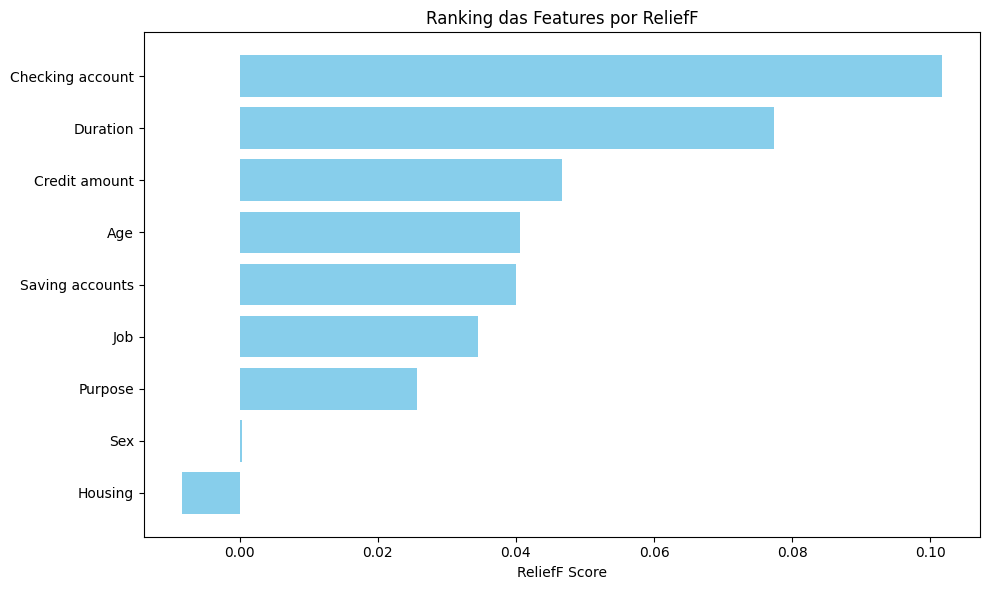

In [ ]:
ranked_features_aggregated_sorted = ranked_features_aggregated.sort_values(ascending=True)

# Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(ranked_features_aggregated_sorted.index, ranked_features_aggregated_sorted.values, color='skyblue')
plt.xlabel('ReliefF Score')
plt.title('Ranking das Features por ReliefF')
plt.tight_layout()
plt.show()

---
## Mutual information - MI

In [ ]:
X_train_variable_selection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               825 non-null    float64
 1   Credit amount     825 non-null    float64
 2   Duration          825 non-null    float64
 3   Saving accounts   825 non-null    float64
 4   Checking account  825 non-null    float64
 5   Job               825 non-null    float64
 6   Sex               825 non-null    object 
 7   Housing           822 non-null    object 
 8   Purpose           816 non-null    object 
dtypes: float64(6), object(3)
memory usage: 58.1+ KB


In [ ]:
from sklearn.feature_selection import mutual_info_classif

discrete_features = [False, False, False, True, True, True, True, True, True]

# X_feature_select_ordinal_encoded = X_train_feature_selected.copy()
# encoder = OrdinalEncoder()
# X_feature_select_ordinal_encoded[['Sex', 'Housing', 'Purpose']] = encoder.fit_transform(X_feature_select_ordinal_encoded[['Sex', 'Housing', 'Purpose']])
# X_feature_select_ordinal_encoded


In [ ]:
X_train_variable_selection_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          825 non-null    float64
 1   Credit amount                825 non-null    float64
 2   Duration                     825 non-null    float64
 3   Saving accounts              825 non-null    float64
 4   Checking account             825 non-null    float64
 5   Sex_female                   825 non-null    float64
 6   Sex_male                     825 non-null    float64
 7   Housing_free                 825 non-null    float64
 8   Housing_own                  825 non-null    float64
 9   Housing_rent                 825 non-null    float64
 10  Purpose_business             825 non-null    float64
 11  Purpose_car                  825 non-null    float64
 12  Purpose_education            825 non-null    float64
 13  Purpose_furniture/eq

In [ ]:
from sklearn.feature_selection import mutual_info_classif
discrete_features = [False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True]

mi_scores = mutual_info_classif(X_train_variable_selection_ohe, y_train_transformed, discrete_features=discrete_features)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [ ]:
mi_scores

array([9.36851608e-02, 3.23554836e-02, 8.23996822e-02, 3.60137786e-02,
       6.62883736e-02, 2.66186117e-03, 2.66186117e-03, 4.37913000e-03,
       1.60395246e-02, 7.66181479e-03, 9.81916421e-05, 3.40342550e-03,
       6.71701913e-04, 7.40802274e-04, 8.71761251e-03, 1.00890480e-03,
       4.75328151e-04])

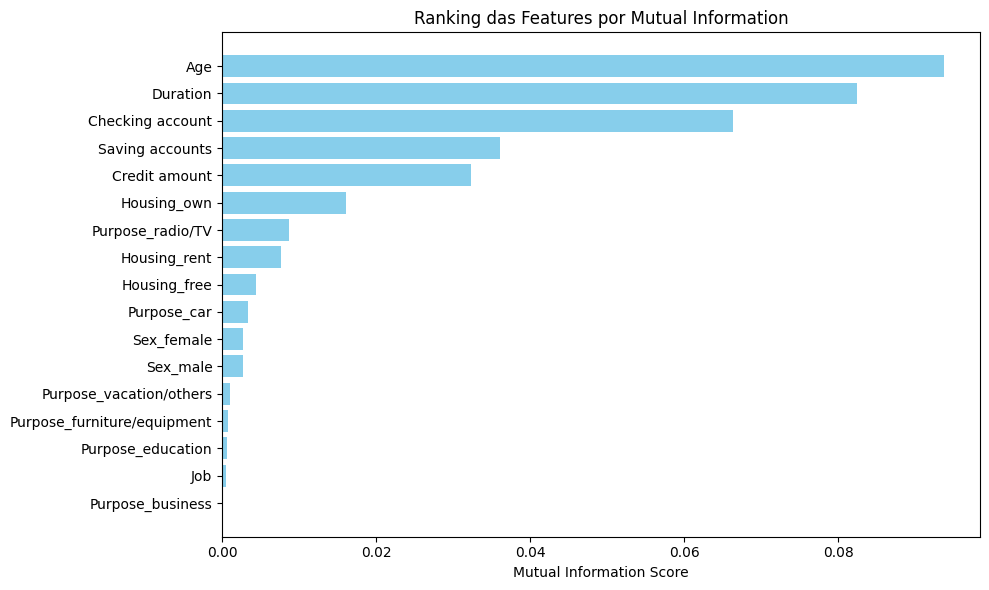

In [ ]:
mi_df = pd.DataFrame({
    'Feature': X_train_variable_selection_ohe.columns,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=True)  # Ordenar para gráfico

# Gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Ranking das Features por Mutual Information')
plt.tight_layout()
plt.show()

In [ ]:

mi_df = pd.DataFrame({
    'feature': X_train_variable_selection_ohe.columns,
    'mi_score': mi_scores
})
mi_df

,feature,mi_score
0,Age,0.093685
1,Credit amount,0.032355
2,Duration,0.082400
3,Saving accounts,0.036014
4,Checking account,0.066288
5,Sex_female,0.002662
6,Sex_male,0.002662
7,Housing_free,0.004379
8,Housing_own,0.016040
9,Housing_rent,0.007662


In [ ]:

def extract_base_name(col):
    for prefix in ['Housing', 'Purpose', 'Sex']:
        if col.startswith(prefix):
            return prefix
    return col

mi_df['base_feature'] = mi_df['feature'].apply(extract_base_name)
aggregated = mi_df.groupby('base_feature')['mi_score'].sum().sort_values(ascending=False)

# aggregated

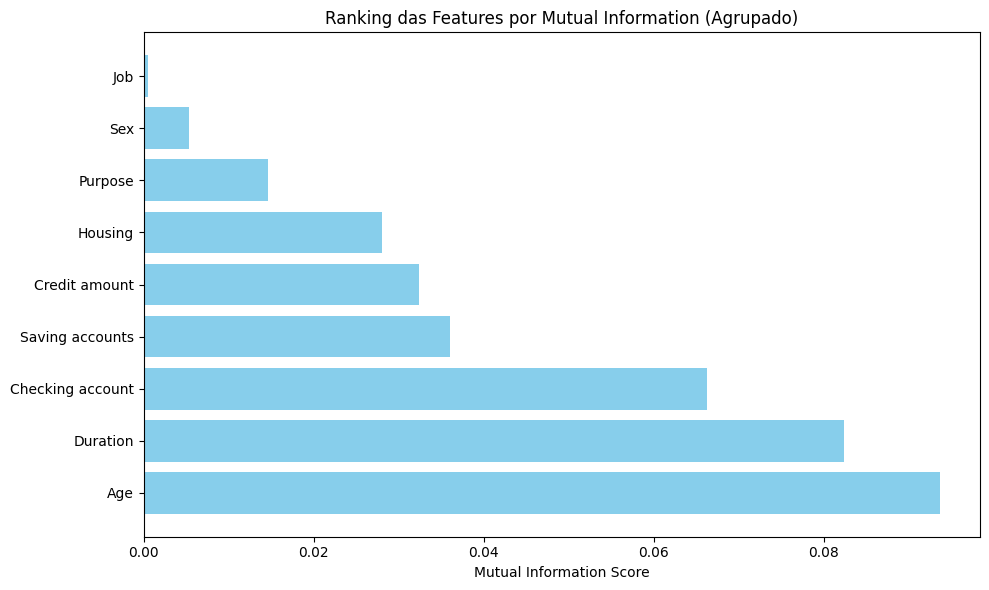

In [ ]:
# Ordena do maior para o menor
aggregated_sorted = aggregated.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(aggregated_sorted.index, aggregated_sorted.values, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Ranking das Features por Mutual Information (Agrupado)')
plt.tight_layout()
plt.show()


## Avaliacao das variaveis

|Método de seleção |chi quadrado( χ2 )|Mutual information ( MI )|ReliefF|
--------------------|----------------------|----------------------|----------------------|
| Age | - | 1 | 4 |
| Credit amount| - | 5 | 3 |
| Duration| - | 2 | 2 |
| Saving accounts| 3 | 4 | 5 |
| Checking account| 1 | 3 | 1 |
| Job | 6 | 9 | 6 |
| Sex | 5 | 8 | 8 |
| Housing | 2 | 6 | 9 |
| Purpose | 4 | 7 | 7 |


Obs: Para kendall tau b usei um mapa de calor que esta no topico:
*Avaliando entre as variaveis de entrada continua - continua
Kendall tau b*. O mapa mostra que nas variaveis continuas e ordinais nao possuem nenhuma redundância, pois não apresenta uma correlação significativa (a maior foi de 0.28)


## Pipeline sem os 'piores' atributos
Irei testar 2 pipelines, 1 sem Job e outro sem Sex e avaliar
Se der tempo avaliar sem Job e sem Sex

### Pipeline sem Job

In [ ]:
numeric_columns = ['Age', 'Credit amount', 'Duration']
ordinal_columns = ['Saving accounts', 'Checking account']
nominal_columns = ['Sex', 'Housing', 'Purpose']

X_train_grouped_without_Job = X_train_grouped.drop(columns=['Job'])
# X_train_grouped_without_Sex = X_train_grouped_without_Job.drop(columns=['Sex'])



In [ ]:

numeric_pipeline = Pipeline([
  ('scaler', StandardScaler()),
])


iter_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=15, random_state=42),
    max_iter=15,
    random_state=42,
    initial_strategy='most_frequent'
)

categories_saving_accounts = ['little', 'moderate', 'quite rich', 'rich']
categories_checking_account = ['little', 'moderate', 'rich']

list_of_category_orders = [categories_saving_accounts, categories_checking_account]

ordinal_encoder_for_imputation = OrdinalEncoder(
    categories=list_of_category_orders,
    handle_unknown='use_encoded_value',
    unknown_value=np.nan
)



ordinal_pipeline = Pipeline([
    ('encoder', ordinal_encoder_for_imputation),
    ('imputer', iter_imputer),
])

ohe = OneHotEncoder(handle_unknown='ignore')

nominal_pipeline = Pipeline([
    ('encoder', ohe)
])

preprocessor_without_job = ColumnTransformer([
    ('num', numeric_pipeline, numeric_columns),
    ('ord', ordinal_pipeline, ordinal_columns),
    ('nom', nominal_pipeline, nominal_columns),
])


In [ ]:
numeric_columns

['Age', 'Credit amount', 'Duration']

In [ ]:
ordinal_columns

['Saving accounts', 'Checking account']

In [ ]:
nominal_columns

['Sex', 'Housing', 'Purpose']

In [ ]:
X_train_grouped_without_Job.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 355 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               800 non-null    int64 
 1   Sex               800 non-null    object
 2   Housing           800 non-null    object
 3   Saving accounts   657 non-null    object
 4   Checking account  486 non-null    object
 5   Credit amount     800 non-null    int64 
 6   Duration          800 non-null    int64 
 7   Purpose           800 non-null    object
dtypes: int64(3), object(5)
memory usage: 56.2+ KB


In [ ]:
import pandas as pd

X_transformed = preprocessor_without_job.fit_transform(X_train_grouped_without_Job)

num_cols = numeric_columns
ord_cols = ordinal_columns

nom_cols = preprocessor_without_job.named_transformers_['nom']['encoder'].get_feature_names_out(nominal_columns)

all_feature_names = list(num_cols) + list(ord_cols) + list(nom_cols)

X_processed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

X_processed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          800 non-null    float64
 1   Credit amount                800 non-null    float64
 2   Duration                     800 non-null    float64
 3   Saving accounts              800 non-null    float64
 4   Checking account             800 non-null    float64
 5   Sex_female                   800 non-null    float64
 6   Sex_male                     800 non-null    float64
 7   Housing_free                 800 non-null    float64
 8   Housing_own                  800 non-null    float64
 9   Housing_rent                 800 non-null    float64
 10  Purpose_business             800 non-null    float64
 11  Purpose_car                  800 non-null    float64
 12  Purpose_education            800 non-null    float64
 13  Purpose_furniture/eq

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline_without_job = ImbPipeline([
    ('preprocess', preprocessor_without_job),
    ('resample', SMOTETomek(
        smote=SMOTENC(
            # categorical_features=[3, 4, 5, 6, 7, 8],
            # categorical_features=[1, 2, 3, 4, 5, 8],
            categorical_features=[3, 4,5,6,7,8,9,10,11,12,13,14,15],
            # categorical_features=[1,2,3,4,5,8]
            sampling_strategy=0.6667,
            random_state=42
        ),
        random_state=42
    )),

  ('clf', DecisionTreeClassifier(random_state=0))
])


from imblearn.pipeline import Pipeline


param_dist = {
    'clf__max_depth': [None, 3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy'],

    # IterativeImputer: se quiser otimizar junto
    'preprocess__ord__imputer__max_iter': [5, 10, 15],
    'preprocess__ord__imputer__estimator__n_estimators': [5, 10, 20],

    # SMOTENC: número de vizinhos no oversampling
    'resample__smote__k_neighbors': [3, 5, 7]
}

search = RandomizedSearchCV(
    pipeline_without_job,
    param_distributions=param_dist,
    n_iter=100,
    scoring={
        'roc_auc': 'roc_auc',
        # 'f1': make_scorer(f1_score)
    },
    refit='roc_auc',
    cv=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train_grouped_without_Job, y_train)

print(search.best_params_)

X_test_group = X_test.copy()
X_test_group['Purpose'] = X_test_group['Purpose'].apply(agrupar_purpose)
X_test_group_without_job = X_test_group.drop(columns=['Job'])

best_model = search.best_estimator_
y_pred = best_model.predict(X_test_group_without_job)
y_proba = best_model.predict_proba(X_test_group_without_job)[:, 1]


f1 = f1_score(y_test, y_pred, pos_label='good')  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'resample__smote__k_neighbors': 5, 'preprocess__ord__imputer__max_iter': 15, 'preprocess__ord__imputer__estimator__n_estimators': 20, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 4, 'clf__max_depth': 3, 'clf__criterion': 'entropy'}
F1-score: 0.8054
ROC AUC: 0.7203


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = search.best_estimator_

y_proba = best_model.predict_proba(X_test_group_without_job)[:, 1]
y_pred = best_model.predict(X_test_group_without_job)

y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)

fpr, tpr, threshold = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test_numeric, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

y_pred_numeric = np.where(y_pred == 'good', 1, 0)

cm = confusion_matrix(y_test_numeric, y_pred_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.show()


### Pipeline sem Sex (melhor resultado)

In [ ]:
numeric_columns = ['Age', 'Credit amount', 'Duration']
ordinal_columns = ['Saving accounts', 'Checking account']
nominal_columns = ['Housing', 'Purpose']


X_train_grouped_without_Sex = X_train_grouped.drop(columns=['Sex'])


In [ ]:
[]
numeric_pipeline = Pipeline([
  ('scaler', StandardScaler()),
])


iter_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=15, random_state=42),
    max_iter=15,
    random_state=42,
    initial_strategy='most_frequent'
)

categories_saving_accounts = ['little', 'moderate', 'quite rich', 'rich']
categories_checking_account = ['little', 'moderate', 'rich']

list_of_category_orders = [categories_saving_accounts, categories_checking_account]

ordinal_encoder_for_imputation = OrdinalEncoder(
    categories=list_of_category_orders,
    handle_unknown='use_encoded_value',
    unknown_value=np.nan
)

rounder = FunctionTransformer(lambda X: np.round(X), feature_names_out='one-to-one')



ordinal_pipeline = Pipeline([
    ('encoder', ordinal_encoder_for_imputation),
    ('imputer', iter_imputer),
])

ohe = OneHotEncoder(handle_unknown='ignore')

nominal_pipeline = Pipeline([
    ('encoder', ohe)
])

preprocessor_without_sex = ColumnTransformer([
    ('num', numeric_pipeline, numeric_columns),
    ('ord', ordinal_pipeline, ordinal_columns),
    ('nom', nominal_pipeline, nominal_columns),
    ('Job', 'passthrough', ['Job'])

])


In [ ]:
import pandas as pd

X_transformed = preprocessor_without_sex.fit_transform(X_train_grouped_without_Sex)

num_cols = numeric_columns
ord_cols = ordinal_columns

nom_cols = preprocessor_without_sex.named_transformers_['nom']['encoder'].get_feature_names_out(nominal_columns)

all_feature_names = list(num_cols) + list(ord_cols) + list(nom_cols) + ['Job']

X_processed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

X_processed_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          800 non-null    float64
 1   Credit amount                800 non-null    float64
 2   Duration                     800 non-null    float64
 3   Saving accounts              800 non-null    float64
 4   Checking account             800 non-null    float64
 5   Housing_free                 800 non-null    float64
 6   Housing_own                  800 non-null    float64
 7   Housing_rent                 800 non-null    float64
 8   Purpose_business             800 non-null    float64
 9   Purpose_car                  800 non-null    float64
 10  Purpose_education            800 non-null    float64
 11  Purpose_furniture/equipment  800 non-null    float64
 12  Purpose_radio/TV             800 non-null    float64
 13  Purpose_vacation/oth

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline_without_sex = ImbPipeline([
    ('preprocess', preprocessor_without_sex),
    ('resample', SMOTETomek(
        smote=SMOTENC(
            # categorical_features=[3, 4, 5, 6, 7, 8],
            # categorical_features=[1, 2, 3, 4, 5, 8],
            categorical_features=[3,4,5,6,7,8,9,10,11,12,13,14],
            # categorical_features=[1,2,3,4,5,8]
            sampling_strategy=0.6667,
            random_state=42
        ),
        random_state=42
    )),

  ('clf', DecisionTreeClassifier(random_state=0))
])


from imblearn.pipeline import Pipeline


param_dist = {
    'clf__max_depth': [None, 3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy'],

    # IterativeImputer: se quiser otimizar junto
    'preprocess__ord__imputer__max_iter': [5, 10, 15],
    'preprocess__ord__imputer__estimator__n_estimators': [5, 10, 20],

    # SMOTENC: número de vizinhos no oversampling
    'resample__smote__k_neighbors': [3, 5, 7]
}

search = RandomizedSearchCV(
    pipeline_without_sex,
    param_distributions=param_dist,
    n_iter=100,
    scoring={
        'roc_auc': 'roc_auc',
        # 'f1': make_scorer(f1_score)
    },
    refit='roc_auc',
    cv=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train_grouped_without_Sex, y_train)

print(search.best_params_)

X_test_group = X_test.copy()
X_test_group['Purpose'] = X_test_group['Purpose'].apply(agrupar_purpose)
X_test_group_without_Sex = X_test_group.drop(columns=['Sex'])

best_model = search.best_estimator_
y_pred = best_model.predict(X_test_group_without_Sex)
y_proba = best_model.predict_proba(X_test_group_without_Sex)[:, 1]


f1 = f1_score(y_test, y_pred, pos_label='good')  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'preprocess__ord__imputer__max_iter': 5, 'preprocess__ord__imputer__estimator__n_estimators': 20, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 1, 'clf__max_depth': 3, 'clf__criterion': 'entropy'}
F1-score: 0.8162
ROC AUC: 0.6250


In [ ]:
y_train.head()

,Risk
355,bad
661,bad
300,good
916,good
294,good


In [ ]:
# 1. Importar as bibliotecas necessárias
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, make_scorer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC

# 2. Definir o pipeline com o XGBoost Classifier
# O nome 'clf' é mantido para compatibilidade com a grade de parâmetros
pipeline_xgb = ImbPipeline([
    ('preprocess', preprocessor_without_sex),
    ('resample', SMOTETomek(
        smote=SMOTENC(
            categorical_features=[3,4,5,6,7,8,9,10,11,12,13,14],
            sampling_strategy=0.6667,
            random_state=42
        ),
        random_state=42
    )),
    ('clf', xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss', # ou 'auc'
        use_label_encoder=False, # Adicionado para evitar warnings futuros
        random_state=42
    ))
])

# 3. Definir a grade de parâmetros para o RandomizedSearchCV com XGBoost
# Nota: Os nomes dos parâmetros do XGBoost são diferentes (ex: max_depth, learning_rate)
param_dist_xgb = {
    # Parâmetros do XGBoost
    'clf__n_estimators': [100, 200, 300, 500],
    'clf__max_depth': [3, 5, 7, 10],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__subsample': [0.7, 0.8, 0.9, 1.0],
    'clf__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'clf__gamma': [0, 0.1, 0.5, 1],

    # Parâmetros do pré-processamento (mantidos do exemplo anterior)
    'preprocess__ord__imputer__max_iter': [5, 10, 15],
    'preprocess__ord__imputer__estimator__n_estimators': [5, 10, 20],

    # Parâmetro do SMOTENC (mantido do exemplo anterior)
    'resample__smote__k_neighbors': [3, 5, 7]
}

# 4. Configurar e executar o RandomizedSearchCV
search_xgb = RandomizedSearchCV(
    pipeline_xgb,
    param_distributions=param_dist_xgb,
    n_iter=100, # Você pode ajustar o número de iterações
    scoring='roc_auc', # Mantido refit='roc_auc'
    refit='roc_auc',
    cv=10, # Mantido cv=10
    random_state=42,
    n_jobs=-1,
    verbose=1
)

label_mapping = {'bad': 0, 'good': 1}

#Converta y_train e y_test
y_train_num = y_train.map(label_mapping)
y_test_num = y_test.map(label_mapping)

search_xgb.fit(X_train_grouped_without_Sex, y_train_num)

X_test_group = X_test.copy()
X_test_group['Purpose'] = X_test_group['Purpose'].apply(agrupar_purpose)
X_test_group_without_Sex = X_test_group.drop(columns=['Sex'])

best_model = search_xgb.best_estimator_
y_pred = best_model.predict(X_test_group_without_Sex)
y_proba = best_model.predict_proba(X_test_group_without_Sex)[:, 1]


f1 = f1_score(y_test_num, y_pred)  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test_num, y_proba)

# print(f"F1-score: {f1:.4f}")
# print(f"ROC AUC: {roc:.4f}")

# # 5. Exibir os melhores parâmetros encontrados
# print("Melhores parâmetros para o XGBoost:")
# print(search_xgb.best_params_)

# # 6. Avaliar o melhor modelo no conjunto de teste
# best_model_xgb = search_xgb.best_estimator_
# y_pred_xgb = best_model_xgb.predict(X_test_group_without_Sex)
# y_proba_xgb = best_model_xgb.predict_proba(X_test_group_without_Sex)[:, 1]

# f1_xgb = f1_score(y_test, y_pred_xgb, pos_label='good')
# roc_xgb = roc_auc_score(y_test, y_proba_xgb)

# print("\nResultados do XGBoost no conjunto de teste:")
# print(f"F1-score: {f1_xgb:.4f}")
# print(f"ROC AUC: {roc_xgb:.4f}")

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:54:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
f1

0.8571428571428571

In [ ]:
roc

np.float64(0.7728571428571429)

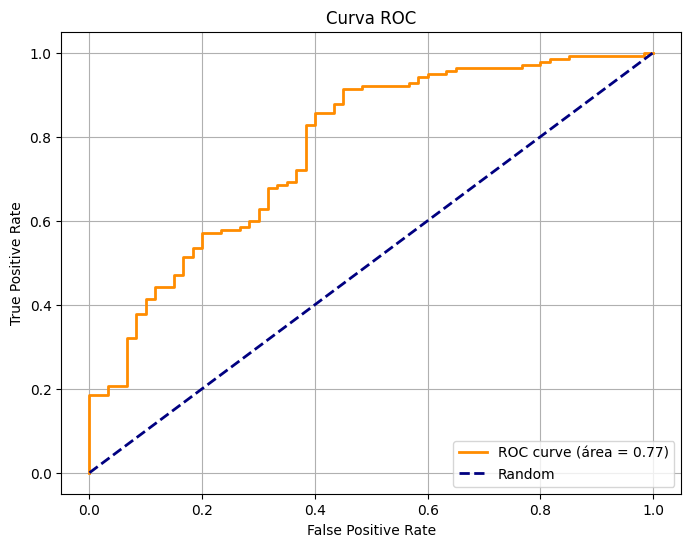

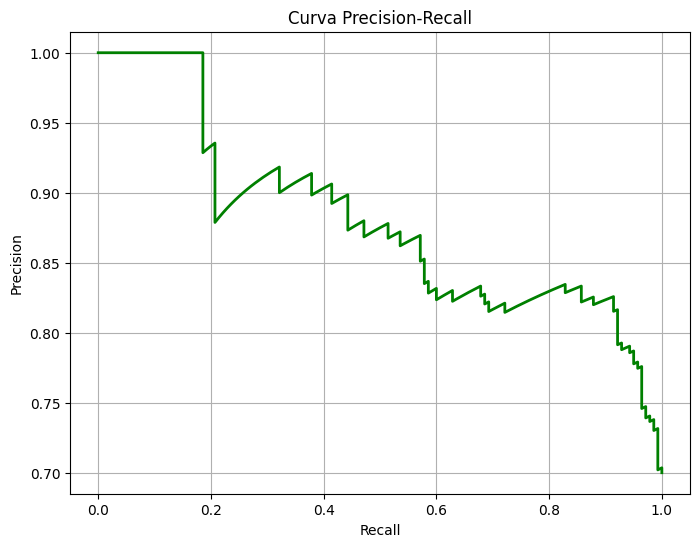

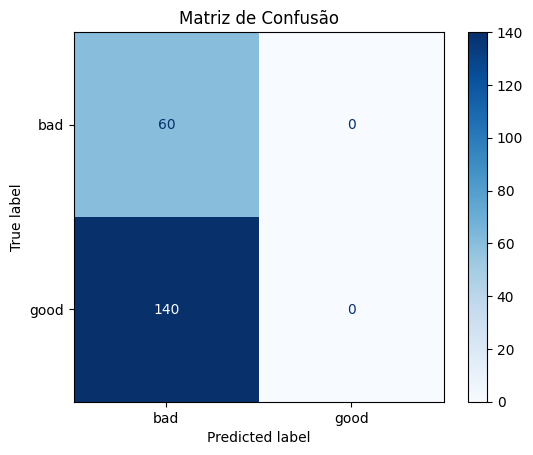

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = search_xgb.best_estimator_

y_proba = best_model.predict_proba(X_test_group_without_Sex)[:, 1]
y_pred = best_model.predict(X_test_group_without_Sex)

y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)

fpr, tpr, threshold = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test_numeric, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

y_pred_numeric = np.where(y_pred == 'good', 1, 0)

cm = confusion_matrix(y_test_numeric, y_pred_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.show()


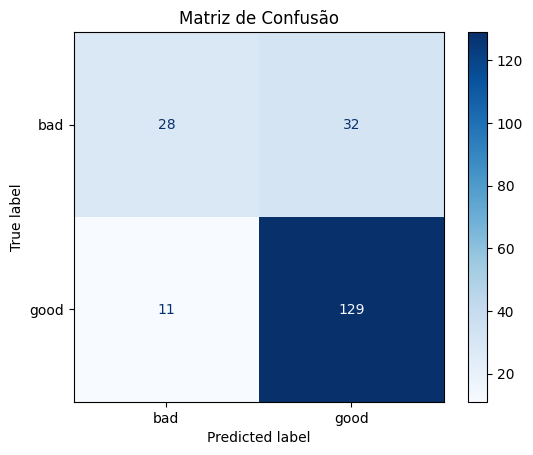

In [ ]:
# cm = confusion_matrix(y_test_numeric, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
# disp.plot(cmap='Blues', values_format='d')
# plt.title('Matriz de Confusão')
# plt.show()


### Pipeline sem Sex e sem Job

In [ ]:
numeric_columns = ['Age', 'Credit amount', 'Duration']
ordinal_columns = ['Saving accounts', 'Checking account']
nominal_columns = ['Housing', 'Purpose']

X_train_grouped_without_Job = X_train_grouped.drop(columns=['Job'])
X_train_grouped_without_Sex_and_Job = X_train_grouped_without_Job.drop(columns=['Sex'])



In [ ]:

numeric_pipeline = Pipeline([
  ('scaler', StandardScaler()),
])


iter_imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=15, random_state=42),
    max_iter=15,
    random_state=42,
    initial_strategy='most_frequent'
)

categories_saving_accounts = ['little', 'moderate', 'quite rich', 'rich']
categories_checking_account = ['little', 'moderate', 'rich']

list_of_category_orders = [categories_saving_accounts, categories_checking_account]

ordinal_encoder_for_imputation = OrdinalEncoder(
    categories=list_of_category_orders,
    handle_unknown='use_encoded_value',
    unknown_value=np.nan
)

ordinal_pipeline = Pipeline([
    ('encoder', ordinal_encoder_for_imputation),
    ('imputer', iter_imputer),
])

ohe = OneHotEncoder(handle_unknown='ignore')

nominal_pipeline = Pipeline([
    ('encoder', ohe)
])

preprocessor_without_Sex_and_Job = ColumnTransformer([
    ('num', numeric_pipeline, numeric_columns),
    ('ord', ordinal_pipeline, ordinal_columns),
    ('nom', nominal_pipeline, nominal_columns),
])


In [ ]:
import pandas as pd

X_transformed = preprocessor_without_Sex_and_Job.fit_transform(X_train_grouped_without_Sex_and_Job)

num_cols = numeric_columns
ord_cols = ordinal_columns

nom_cols = preprocessor_without_Sex_and_Job.named_transformers_['nom']['encoder'].get_feature_names_out(nominal_columns)

all_feature_names = list(num_cols) + list(ord_cols) + list(nom_cols)

X_processed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

X_processed_df.info()


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline_without_Sex_and_Job = ImbPipeline([
    ('preprocess', preprocessor_without_Sex_and_Job),
    ('resample', SMOTETomek(
        smote=SMOTENC(
            # categorical_features=[3, 4, 5, 6, 7, 8],
            # categorical_features=[1, 2, 3, 4, 5, 8],
            categorical_features=[3,4,5,6,7,8,9,10,11,12,13],
            # categorical_features=[1,2,3,4,5,8]
            sampling_strategy=0.6667,
            random_state=42
        ),
        random_state=42
    )),

  ('clf', DecisionTreeClassifier(random_state=0))
])


from imblearn.pipeline import Pipeline


param_dist = {
    'clf__max_depth': [None, 3, 5, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy'],

    # IterativeImputer: se quiser otimizar junto
    'preprocess__ord__imputer__max_iter': [5, 10, 15],
    'preprocess__ord__imputer__estimator__n_estimators': [5, 10, 20],

    # SMOTENC: número de vizinhos no oversampling
    'resample__smote__k_neighbors': [3, 5, 7]
}

search = RandomizedSearchCV(
    pipeline_without_Sex_and_Job,
    param_distributions=param_dist,
    n_iter=100,
    scoring={
        'roc_auc': 'roc_auc',
        # 'f1': make_scorer(f1_score)
    },
    refit='roc_auc',
    cv=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train_grouped_without_Sex_and_Job, y_train)

print(search.best_params_)

X_test_group = X_test.copy()
X_test_group['Purpose'] = X_test_group['Purpose'].apply(agrupar_purpose)
X_test_group_without_Sex_and_Job = X_test_group.drop(columns=['Job'])

best_model = search.best_estimator_
y_pred = best_model.predict(X_test_group_without_Sex_and_Job)
y_proba = best_model.predict_proba(X_test_group_without_Sex_and_Job)[:, 1]


f1 = f1_score(y_test, y_pred, pos_label='good')  # ou 'bad', dependendo da sua classe positiva
roc = roc_auc_score(y_test, y_proba)

print(f"F1-score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = search.best_estimator_

y_proba = best_model.predict_proba(X_test_group_without_Sex_and_Job)[:, 1]
y_pred = best_model.predict(X_test_group_without_Sex_and_Job)

y_test_numeric = y_test.apply(lambda x: 1 if x == 'good' else 0)

fpr, tpr, threshold = roc_curve(y_test_numeric, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test_numeric, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()

y_pred_numeric = np.where(y_pred == 'good', 1, 0)

cm = confusion_matrix(y_test_numeric, y_pred_numeric)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad', 'good'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusão')
plt.show()


## Qual a melhor seleção de variavel?
De acordo com o score de f1 e roc auc percebe-ce que o melhor resultado foi ao tirar o atributo Sex. Tirando ele conseguimos:

F1-score: 0.8310

ROC AUC: 0.7568

---
# Treinando outros modelos

---
# Overview trabalho



## 1. a)

| Atributo         | Tipo       | Escala  | Cardinalidade | Observações                     |
| ---------------- | ---------- | ------- | ------------- | ------------------------------- |
| Age              | Numérico   | Razão   | Contínua      | Idade do cliente em anos        |
| Duration              | Numérico   | Razão   | Contínua      | Em meses        |
| Credit amount             | Numérico   | Razão   | Contínua      | numeric, in DM       |
| Job              | Categórico | Ordinal | Discreta      | Níveis de emprego (0 a 3)       |
| Sex              | Categórico | Nominal | Binária       | 'male' ou 'female'              |
| Checking account | Categórico | Ordinal | Discreta      | 'little', 'moderate', 'rich', 'little rich' |
| Saving accounts  | Categórico | Ordinal | Discreta      | 'little', 'moderate', 'rich', 'little rich'           |
| Housing          | Categórico | Nominal | Discreta      | 'own', 'free', rent              |
| Purpose          | Categórico | Nominal | Discreta      | 'car', 'business', etc          |
| Risk (target)    | Categórico | Nominal | Binária       | 'good' ou 'bad'                 |


Mais informações sobre as variaveis:

Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [ ]:
|#Valores unicos das variaveis categoricas
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"Coluna: {col}")
    print(X[col].unique())  # Valores únicos
    print("\n---\n")
print("Coluna: Job")
print(X_train['Job'].unique())

## 1. b)

In [ ]:
X_train.info()

In [ ]:
X_train.describe()

## 1. c)
**i.** Em limpeza de dados tentei aplicar remocao de outliers com iqr porém o resultado ficou relativamente pior, decidir não remove-los. Missing values eu preenchi com um iterative imputer com randomforest

<br>

**ii.** Normalização usei StandardScaler() para evitar problemas com escala dos numeros, com um possível KNNimputer ou classfier.

Usei também SMOTE NC - nominal and continuos para imputação de dados com tomek link para tirar variáveis da classe majoritaria. Como o balanceamento de 50-50 não teve resultado favorável optei por usar ≃ 60 - 40 das classes good e bad

Também fiz um agrupamento de 2 variaveis que praticamente não tinham ocorrência no dataset que poderia atrapalhar a arvore de decisão.

<br>

**iii**
Optei por nao fazer uma discretização porque isso nao afeta a arvore de decisão e nem os outros passos de pre processamento que eu fiz.